<center><h1>Lending Club Loan Applicant Worthiness Analysis</h1>
<h4>To Recommend With High Accuracy and Precision The Parties Likely to Pay Back The Loan</h4>
<h4>Analysis Done And Recommendmenations Presented By:</h4></center>
<div align="right"><h3>Abhinav Tyagi And Vinay Pai</h3>
<h3>Happy to Assist at +91-9755504588 or abhinav@vayubiotech.com</h3></div>

<h3>Small Gist</h3>

<p>King Consultants, Abhinav Tyagi and Vinay Pai are assigned to do an analysis of Loan Applicants recevied by the organisation called Lending Club.</p> 
    
    We Need to do the following two things:
<b>1. Maximize the Loans Granted To The Partiest That Can Pay Back</b>        
    <p>Qualify and recommend the parties that are likely to repay the loan, without recommending anyone that can't pay back.</p>
<b>2. Minimise The Loans Granted To Parties that Aren't Likely to Pay Back</b>
    <p>Thereby addressing the greatest loss making variable of the organisation, ie, approving loan to people that can't pay back, without removing the parties that can pay back.</p>

<center><h1>Lets Start By Importing the Required Libraries For Our Analysis</h1></center>


In [1]:
import pandas as pd #Allowing us to import our sheet as a Dataframe in our Program for various operations
import numpy as np #Allowing us to run very fast C-like Array Operations on Data.
#Lastly, Libraries to Help us Run Visualisation Operations On Our Sheets.
import seaborn as sns
import matplotlib.pyplot as plt



<center><h3>Importing The CSV Sheet Containing the Data into our Program as a Pandas DataFrame</h3></center>


In [2]:
candidates = pd.read_csv('dataset/loan.csv', dtype=object)

<h3><center>Finding Out the Shape and Datatype Of Candidates DATAFRAME</h3></center>

In [3]:
print(candidates.info())
print(candidates.shape)
print(candidates.dtypes)
print(candidates.head()) #First 5 Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None
(39717, 111)
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object
        id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   
3  1076863   1277178     10000       10000           10000   36 months   
4  1

<center><h1><b>Finding Gibberish: Cleaning Our Candidates DataSet</h1></center></b>

<h4>1. Finding Nulls And Duplicates and Missing Values</h4>

In [4]:
duplicates=candidates[candidates.duplicated(['id'])]
print(duplicates.count())
print("\nNo Duplications in the DataFrame...")

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 111, dtype: int64

No Duplications in the DataFrame...


In [5]:
#Getting Rid of Annoying Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Missing Values
print('Total Missing Values are ', candidates.isnull().all(axis=1).sum())
print('Total empty Columns are ', candidates.isnull().all(axis=0).sum())


Total Missing Values are  0
Total empty Columns are  54


In [7]:
#Null Values In Columns

print(candidates.isnull().sum())


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


<h4>2. Removing Nulls And Duplicates and Missing Values</h4>

In [8]:
candidates.drop(candidates.iloc[:, 53:105], inplace = True, axis = 1)

dropped1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
candidates.drop(labels = dropped1, axis =1, inplace=True)
dropped2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
candidates.drop(labels = dropped2, axis =1, inplace=True)
dropped3 = ["member_id","url","emp_title","zip_code","tax_liens"]
candidates.drop(labels = dropped3, axis =1, inplace=True)


In [9]:
import re
pd.options.display.float_format = '{:.2f}'.format 
candidates.emp_length.fillna('0',inplace=True)
candidates['emp_length']=candidates.emp_length.str.extract('(\d+)')
candidates.head()

id loan_amnt funded_amnt funded_amnt_inv        term int_rate  \
0  1077501      5000        5000            4975   36 months   10.65%   
1  1077430      2500        2500            2500   60 months   15.27%   
2  1077175      2400        2400            2400   36 months   15.96%   
3  1076863     10000       10000           10000   36 months   13.49%   
4  1075358      3000        3000            3000   60 months   12.69%   

  installment grade sub_grade emp_length  ... total_rec_late_fee recoveries  \
0      162.87     B        B2         10  ...                  0          0   
1       59.83     C        C4          1  ...                  0     117.08   
2       84.33     C        C5         10  ...                  0          0   
3      339.31     C        C1         10  ...              16.97          0   
4       67.79     B        B5          1  ...                  0          0   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                       0       Jan-15          171.62             May-16   
1                    1.11       Apr-13          119.66             Sep-13   
2                       0       Jun-14          649.91             May-16   
3                       0       Jan-15          357.48             Apr-16   
4                       0       May-16           67.79             May-16   

  collections_12_mths_ex_med policy_code application_type pub_rec_bankruptcies  
0                          0           1       INDIVIDUAL                    0  
1                          0           1       INDIVIDUAL                    0  
2                          0           1       INDIVIDUAL                    0  
3                          0           1       INDIVIDUAL                    0  
4                          0           1       INDIVIDUAL                    0  

[5 rows x 45 columns]

In [10]:
candidates.pub_rec_bankruptcies.fillna('Not Known',inplace=True) #getting rid of another unwanted Series

In [11]:
#Columns To Run Operations.
candidates.issue_d = pd.to_datetime(candidates.issue_d, format='%b-%y')
candidates['year']=candidates['issue_d'].dt.year
candidates['month']=candidates['issue_d'].dt.month

candidates.head()


id loan_amnt funded_amnt funded_amnt_inv        term int_rate  \
0  1077501      5000        5000            4975   36 months   10.65%   
1  1077430      2500        2500            2500   60 months   15.27%   
2  1077175      2400        2400            2400   36 months   15.96%   
3  1076863     10000       10000           10000   36 months   13.49%   
4  1075358      3000        3000            3000   60 months   12.69%   

  installment grade sub_grade emp_length  ... collection_recovery_fee  \
0      162.87     B        B2         10  ...                       0   
1       59.83     C        C4          1  ...                    1.11   
2       84.33     C        C5         10  ...                       0   
3      339.31     C        C1         10  ...                       0   
4       67.79     B        B5          1  ...                       0   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d collections_12_mths_ex_med  \
0       Jan-15          171.62             May-16                          0   
1       Apr-13          119.66             Sep-13                          0   
2       Jun-14          649.91             May-16                          0   
3       Jan-15          357.48             Apr-16                          0   
4       May-16           67.79             May-16                          0   

  policy_code application_type pub_rec_bankruptcies  year month  
0           1       INDIVIDUAL                    0  2011    12  
1           1       INDIVIDUAL                    0  2011    12  
2           1       INDIVIDUAL                    0  2011    12  
3           1       INDIVIDUAL                    0  2011    12  
4           1       INDIVIDUAL                    0  2011    12  

[5 rows x 47 columns]

<h1>Analysis</h1>

In [12]:
candidates['int_rate'] = candidates['int_rate'].str.rstrip('%')
candidates['revol_util'] = candidates['revol_util'].str.rstrip('%')

In [13]:

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
candidates[cols1] = candidates[cols1].apply(pd.to_numeric)

<h3>    1. Univariate</h3>

In [14]:
candidates['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

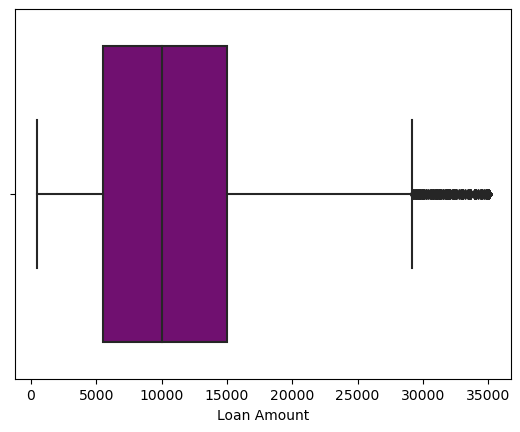

In [15]:
loan_amount = candidates.loan_amnt
loanplot=sns.boxplot(loan_amount, color = "Purple")
plt.xlabel("Loan Amount")
plt.show(loanplot)

In [16]:
candidates.total_pymnt.describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

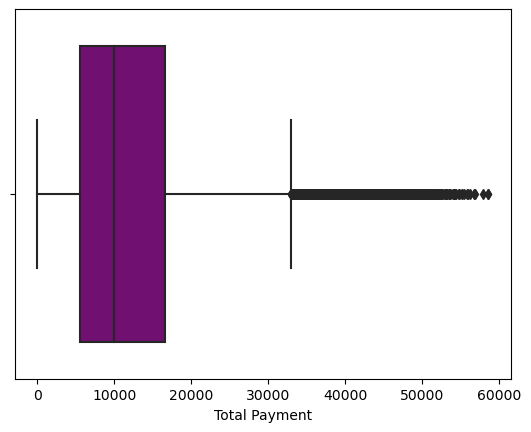

In [17]:
total_payment = candidates.total_pymnt
total_payment=sns.boxplot(total_payment, color = "Purple")
plt.xlabel("Total Payment")
plt.show(total_payment)

<h2>Lets Compare the Data Before and After Outlier Removal</h2>

<center><h5>1. Before Removal</h5></center>

In [18]:
print ("Not Removed Outliers Yet!\n", candidates['annual_inc'].describe())


Not Removed Outliers Yet!
 count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64


<center><h5>2. After Removal</h5></center>

In [19]:
candidates = candidates[candidates["annual_inc"] < candidates["annual_inc"].quantile(0.99)]

In [20]:
print ("Now removed!\nHere are the Results!\n", candidates['annual_inc'].describe())


Now removed!
Here are the Results!
 count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


<center><h1>Annual Income Box Plot</h1></center>
<p>This Would help us figure out the distribution of annual income of our applicants. A very important Qualifying Factor!</p>

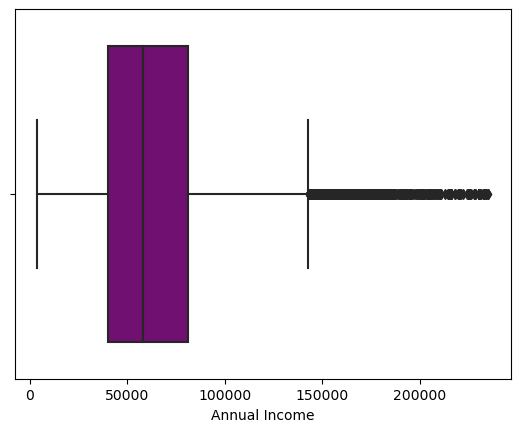

In [21]:
annual_income = candidates.annual_inc
annual_income=sns.boxplot(annual_income, color = "Purple")
plt.xlabel("Annual Income")
plt.show(annual_income)

In [22]:
candidates['int_rate'].describe()

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

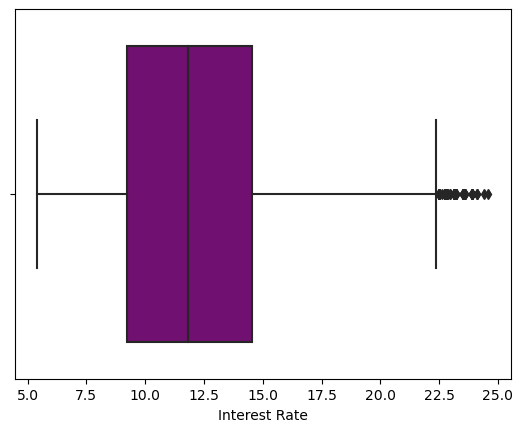

In [23]:
interest_rate = candidates.int_rate
interest_rate=sns.boxplot(interest_rate, color = "Purple")
plt.xlabel("Interest Rate")
plt.show(annual_income)

<center><h2>Contiuous Variables - Correlation Matrix</h2></center>

<b>Heatmap</b> <i>(Bi-Variate Analysis)</i>

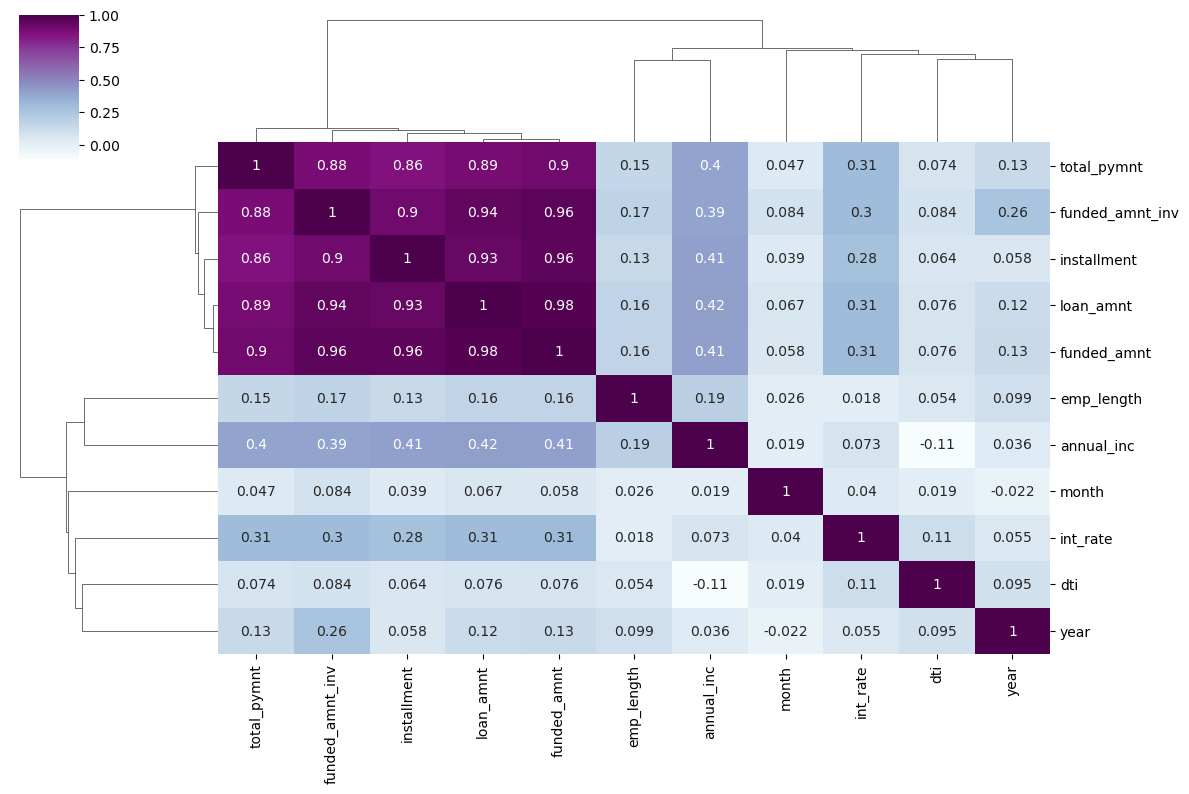

In [24]:
condidate_corr = candidates.corr()
sns.clustermap(condidate_corr,annot=True,figsize=(12, 8),cmap="BuPu")
plt.show()

<b>Further Cleaning Data</b> <i>(Too many unnecessary columns)</i>

In [25]:
candidates.drop(labels =  ["application_type","policy_code","initial_list_status","installment","pymnt_plan"], axis =1, inplace=True)
print (candidates.shape)
candidates.isnull().sum()

(39319, 42)


id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    49
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

<center><h3>Storing Columns in Sections</h3></center>


<h3>categorising loans into sections (loan_amnt_cats)</h3>


In [26]:
candidates['loan_amnt_cats'] = pd.cut(candidates['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])


<h3> Sectioning annual_inc into annual_inc_cats</h3>


In [27]:
candidates['annual_inc_cats'] = pd.cut(candidates['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


<h3>Sectioning intinto int_rate_cats</h3>


In [28]:
candidates['int_rate_cats'] = pd.cut(candidates['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])


<h3> Sectioning dti into dti_cats</h3>


In [29]:
candidates['dti_cats'] = pd.cut(candidates['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


In [30]:
#Lets see where we stand

print(candidates.shape)
candidates.head()

(39319, 46)


id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000          4975.00   36 months     10.65   
1  1077430       2500         2500          2500.00   60 months     15.27   
2  1077175       2400         2400          2400.00   36 months     15.96   
3  1076863      10000        10000         10000.00   36 months     13.49   
4  1075358       3000         3000          3000.00   60 months     12.69   

  grade sub_grade  emp_length home_ownership  ...  last_pymnt_amnt  \
0     B        B2          10           RENT  ...           171.62   
1     C        C4           1           RENT  ...           119.66   
2     C        C5          10           RENT  ...           649.91   
3     C        C1          10           RENT  ...           357.48   
4     B        B5           1           RENT  ...            67.79   

  last_credit_pull_d collections_12_mths_ex_med pub_rec_bankruptcies  year  \
0             May-16                          0                    0  2011   
1             Sep-13                          0                    0  2011   
2             May-16                          0                    0  2011   
3             Apr-16                          0                    0  2011   
4             May-16                          0                    0  2011   

  month loan_amnt_cats  annual_inc_cats int_rate_cats dti_cats  
0    12         0-7000      20000-40000         10-13      NaN  
1    12         0-7000      20000-40000       12.5-16      0-5  
2    12         0-7000          0-20000       12.5-16    05-10  
3    12     7000-14000      40000-60000       12.5-16    15-20  
4    12         0-7000      60000-80000       12.5-16    15-20  

[5 rows x 46 columns]

<i>(We added 5 Extra Columns)</i>

<h3>Distribution Plot</h3>

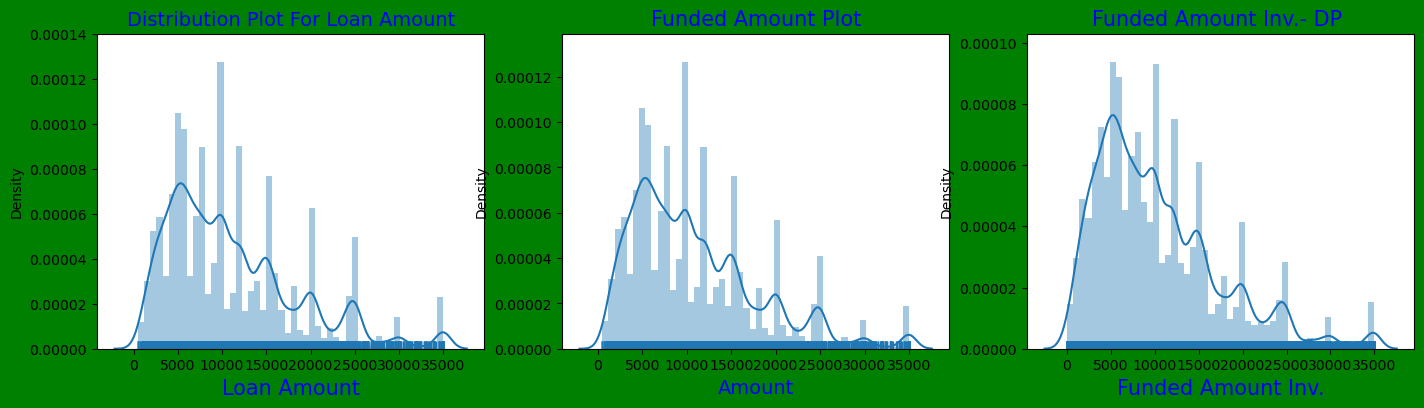

In [31]:
plt.figure(figsize=(17,9),facecolor='g')
plt.subplot(2, 3, 1)
ax = sns.distplot(candidates['loan_amnt'],rug = True)
ax.set_title('Distribution Plot For Loan Amount',fontsize=14,color='b')
ax.set_xlabel('Loan Amount',fontsize=15,color='b')
plt.subplot(2, 3, 2)
ax = sns.distplot(candidates['funded_amnt'],rug = True)
ax.set_title('Funded Amount Plot',fontsize=15,color='b')
ax.set_xlabel('Amount',fontsize=14,color='b')
plt.subplot(2, 3, 3)
ax = sns.distplot(candidates['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv.- DP ',fontsize=15,color='b')
ax.set_xlabel('Funded Amount Inv.',fontsize=15,color='b')
plt.show()


<h4><i><center>Since the Distribution Appears to Be Similar We Would Be Using Just One of The Loan Columns for further Analysis</i></h4></center>

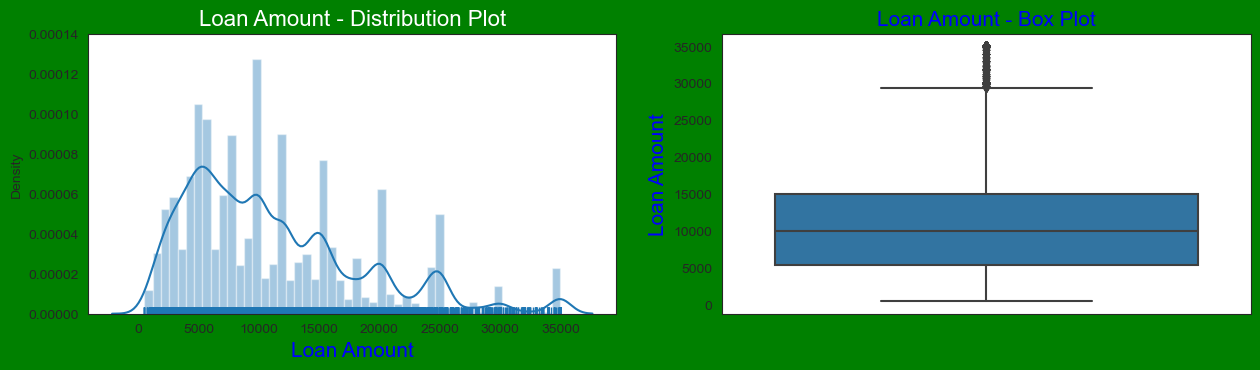

In [32]:
plt.figure(figsize=(15,8),facecolor='g')
sns.set_style("white")
plt.subplot(2, 2, 1)
ax = sns.distplot(candidates['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=15,color='b')
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=candidates['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=15,color='b')
ax.set_ylabel('Loan Amount',fontsize=15,color='b')
plt.show()

<h4><i><center>We, Therefore Can Conclude that Interest Rates Are Heavily Concentrated In 10-15% Range.</h4></i></center>

<h3><b>Catergorical Variables Analysis of Present Loan Status</b></h3>

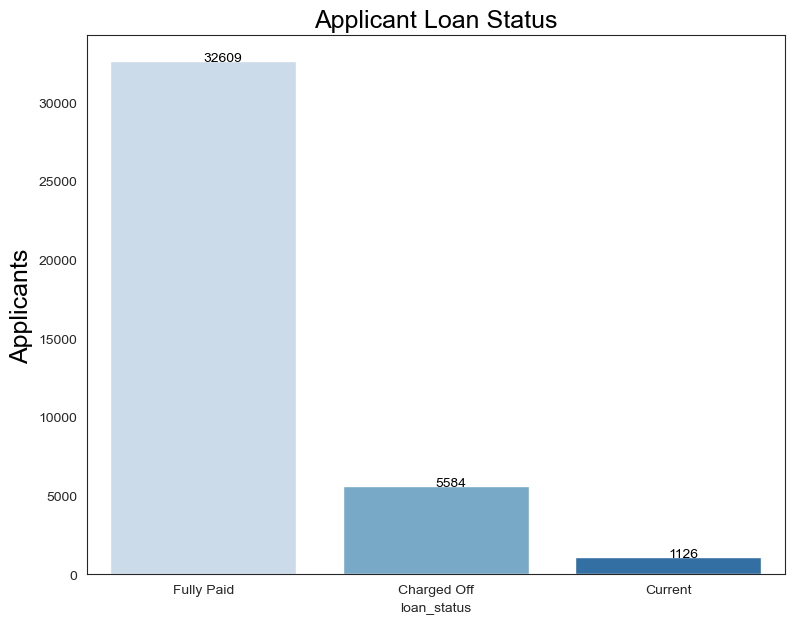

In [33]:
plt.figure(figsize=(9,7),facecolor='white')
sns.set_style("white")
ax = sns.countplot(x="loan_status",data=candidates,palette='Blues')
ax.set_title('Applicant Loan Status',fontsize=18,color='black')
ax.set_ylabel('Applicants',fontsize=18,color = 'black')            
# To show count of values above bars
s=candidates['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='black')


<h4><i><center>We can therefore Infer That Roughly 14% Loans Were Charged Off Out Of Total Loan Issued</h4></i></center>

<h3><b>Catergorical Variables Analysis of Loan Purpose</b></h3>


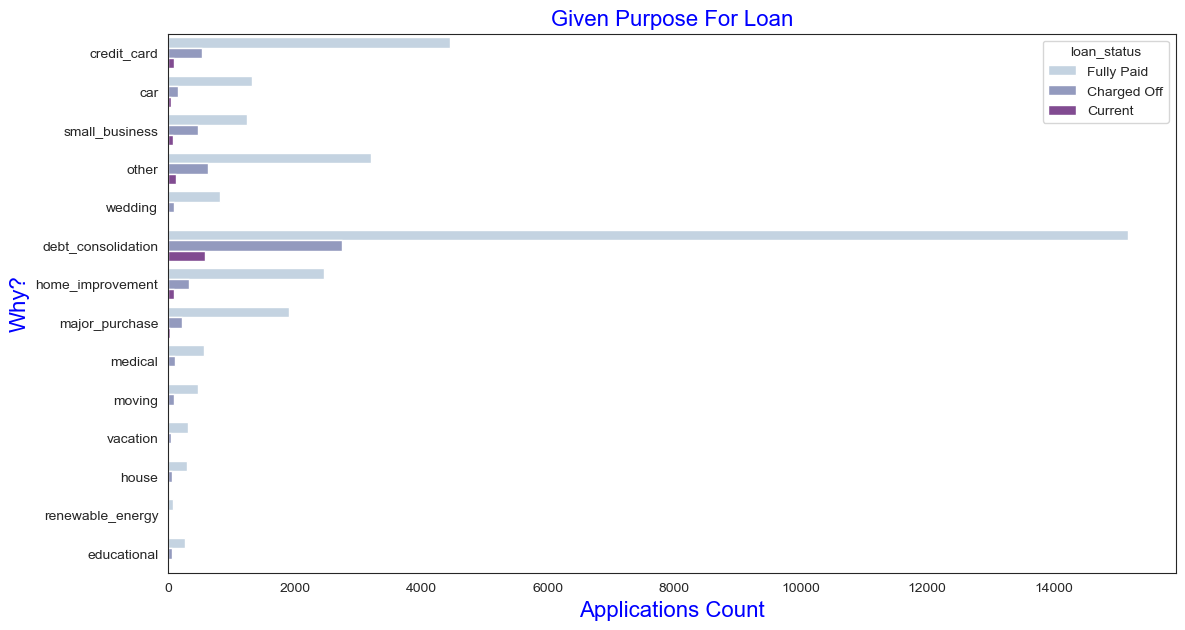

In [34]:
plt.figure(figsize=(13,7),facecolor='white')
sns.set_style("white")
ax = sns.countplot(y="purpose",data=candidates,hue='loan_status',palette='BuPu')
ax.set_title('Given Purpose For Loan',fontsize=16,color='b')
ax.set_ylabel('Why?',fontsize=16,color = 'b')
ax.set_xlabel('Applications Count',fontsize=16,color = 'b')      
plt.show()


<h4><i><center>Quite Evident that loans Picked Up For Paying Off Other Liabilities Like Credit Card and other types of consolidation have a high charge off rate. These were also large chunk of applications and very high charge off rates.</h4></i></center>

<h3><b>Analysis Based On Home Ownership</b></h3>


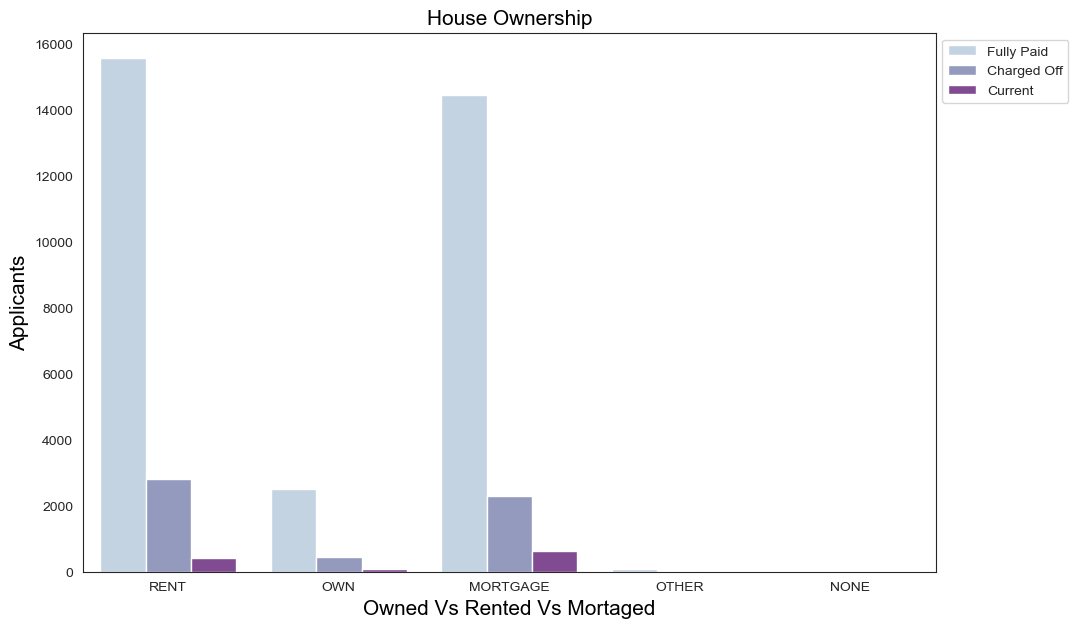

In [35]:
plt.figure(figsize=(11,7),facecolor='white')
ax = sns.countplot(x="home_ownership",data=candidates,hue='loan_status',palette='BuPu')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('House Ownership',fontsize=15,color='black')
ax.set_xlabel('Owned Vs Rented Vs Mortaged',fontsize=15,color = 'black')
ax.set_ylabel('Applicants',fontsize=15,color = 'black')      
plt.show()

<h4><i><center>It can therefore be concluded that people with high house ownership rates are radically safer applicants for discharging loans, as applicants with rent and mortgages a lot higher Charged Off Rates</h4></i></center>

<h3><b>Correlation Between Passing Months/Years, Loan Approval and Charge Off Rates</h3></b>

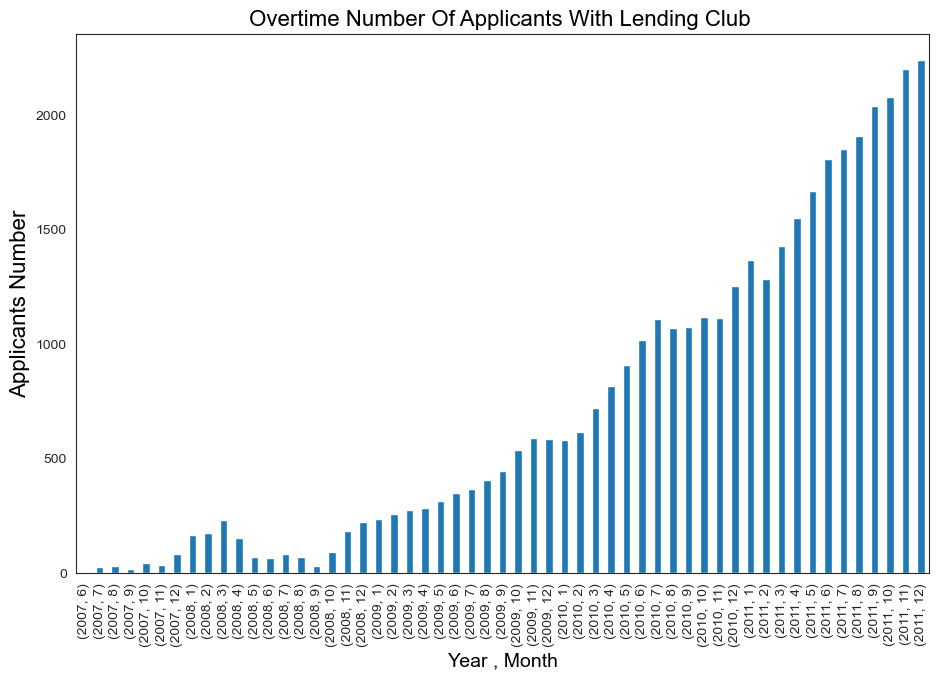

In [36]:
plt.figure(figsize=(11,7),facecolor='white')
candidates.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Applicants Number',fontsize=16,color='black')
plt.xlabel('Year , Month',fontsize=14,color = 'black')      
plt.title("Overtime Number Of Applicants With Lending Club ",fontsize=16,color='black')
plt.show()


<h4><i><center>Company is witnessing solid increase in the number of Applicants over time, apart from the time of recession in 2008.<br> <br>Unquestionably, even at same charge off percentage, the absolute number of charge off are climbing along with number the growth of applicants over time. Meaning Charge Off percentage needs to be reduced as the applicants grow over time.</h4></i></center>

<h3><b>Loan Paying Term Analysis</h3></b>

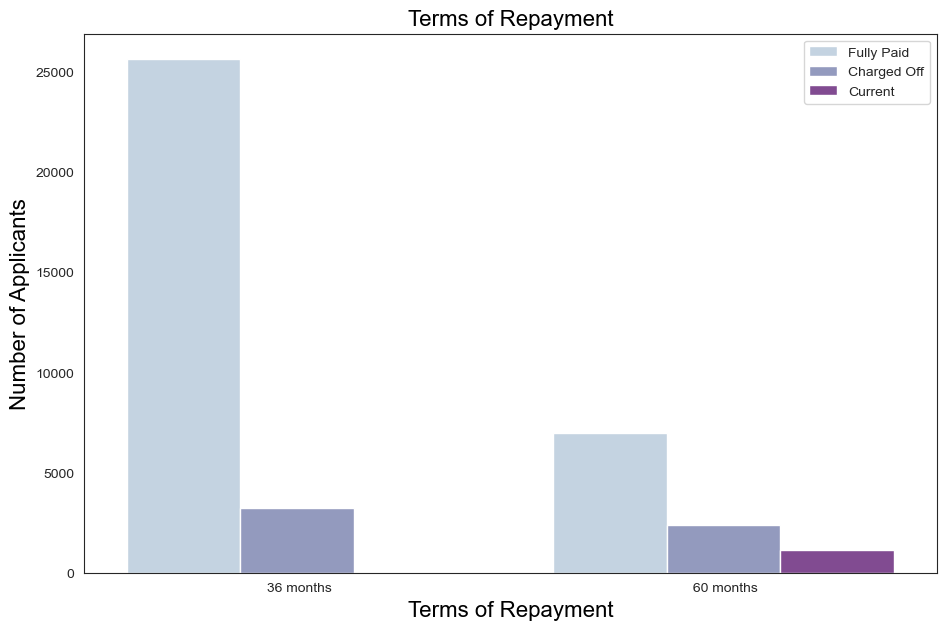

In [37]:
plt.figure(figsize=(11,7),facecolor='white')
ax = sns.countplot(x="term",data=candidates,hue='loan_status',palette='BuPu')
ax.set_title('Terms of Repayment',fontsize=16,color='black')
ax.set_xlabel('Terms of Repayment',fontsize=16,color = 'black')
ax.set_ylabel('Number of Applicants',fontsize=16,color = 'black')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

<h4><i><center>Clearly, applicants applying for shorter terms of repayment, are a lot more likely to pay on time than applicants getting longer window of time to repay. </h4></i></center>

<center><h1><b>Bivariate Analysis</b><i>(Charge Offs Analysis)</i></h1></center>

<h3><b>Annual Income v/s Chargedoff_proportion</h3></b>

In [38]:
incomeVSloan = candidates.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
incomeVSloan['Total'] = incomeVSloan['Charged Off'] + incomeVSloan['Current'] + incomeVSloan['Fully Paid'] 
incomeVSloan['Chargedoff_Proportion'] = incomeVSloan['Charged Off'] / incomeVSloan['Total']
incomeVSloan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status annual_inc_cats  Charged Off  Current  Fully Paid  Total  \
0                   0-20000          237        9         943   1189   
1               20000-40000         1514      170        7004   8688   
2               40000-60000         1729      345        9534  11608   
3               60000-80000         1024      240        6597   7861   
4                   80000 +         1080      362        8531   9973   

loan_status  Chargedoff_Proportion  
0                             0.20  
1                             0.17  
2                             0.15  
3                             0.13  
4                             0.11

<h4>Bar Plot of This Information For Easier Understanding.</h4>

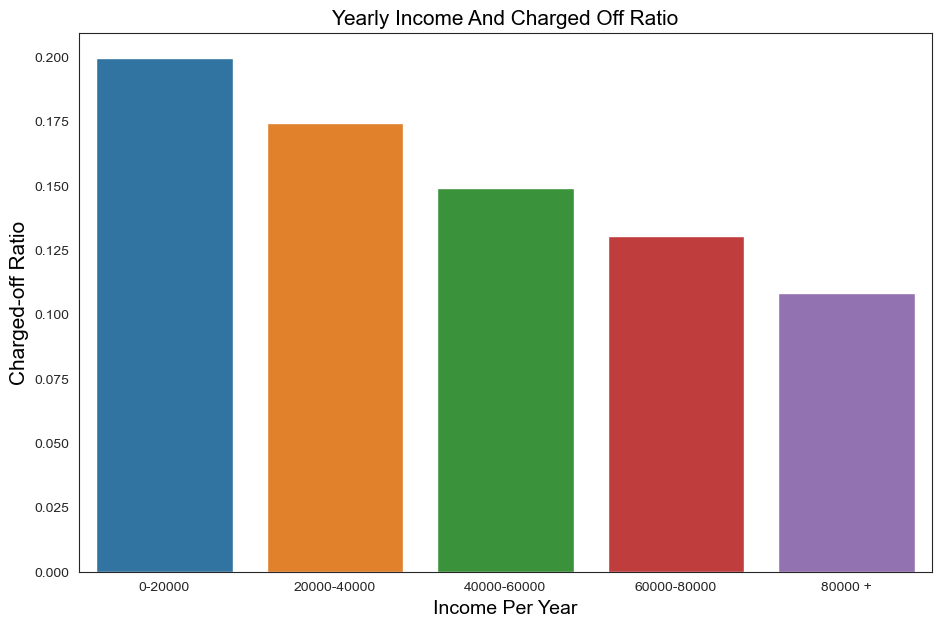

In [39]:
fig, ax1 = plt.subplots(figsize=(11, 7),facecolor='white')
ax1.set_title('Yearly Income And Charged Off Ratio',fontsize=15,color = 'black')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=incomeVSloan)
ax1.set_ylabel('Charged-off Ratio',fontsize=15,color = 'black')
ax1.set_xlabel('Income Per Year',fontsize=14,color='black')
plt.show()

<h4><i><center>Very direct correlation between Income and Charged-Off Ratio. It is almost linearly in negative proportion with Income Per Year. As the Income Goes up, Charged-off Rate Goes Down.</h4></i></center>

<h3><b>Loan Purpose V/S ChargedOff Ratio</h3></b>

<b><i><h4>Generating Data</h4></b></i>

In [40]:
purposeVsChargeOff = candidates.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purposeVsChargeOff['Total'] = purposeVsChargeOff['Charged Off'] + purposeVsChargeOff['Current'] + purposeVsChargeOff['Fully Paid'] 
purposeVsChargeOff['Chargedoff_Proportion'] = purposeVsChargeOff['Charged Off'] / purposeVsChargeOff['Total']
purposeVsChargeOff.sort_values('Chargedoff_Proportion', ascending=False)

loan_status             purpose  Charged Off  Current  Fully Paid    Total  \
11               small_business       472.00    74.00     1251.00  1797.00   
10             renewable_energy        19.00     1.00       81.00   101.00   
3                   educational        55.00     0.00      268.00   323.00   
9                         other       629.00   126.00     3203.00  3958.00   
8                        moving        91.00     7.00      479.00   577.00   
5                         house        58.00    14.00      299.00   371.00   
7                       medical       106.00    12.00      568.00   686.00   
2            debt_consolidation      2752.00   580.00    15165.00 18497.00   
12                     vacation        53.00     6.00      322.00   381.00   
4              home_improvement       338.00    97.00     2459.00  2894.00   
1                   credit_card       537.00   102.00     4450.00  5089.00   
0                           car       160.00    50.00     1332.00  1542.00   
6                major_purchase       220.00    37.00     1909.00  2166.00   
13                      wedding        94.00    20.00      823.00   937.00   

loan_status  Chargedoff_Proportion  
11                            0.26  
10                            0.19  
3                             0.17  
9                             0.16  
8                             0.16  
5                             0.16  
7                             0.15  
2                             0.15  
12                            0.14  
4                             0.12  
1                             0.11  
0                             0.10  
6                             0.10  
13                            0.10

<h4>Plotting this Data For Visual Understanding</h4>

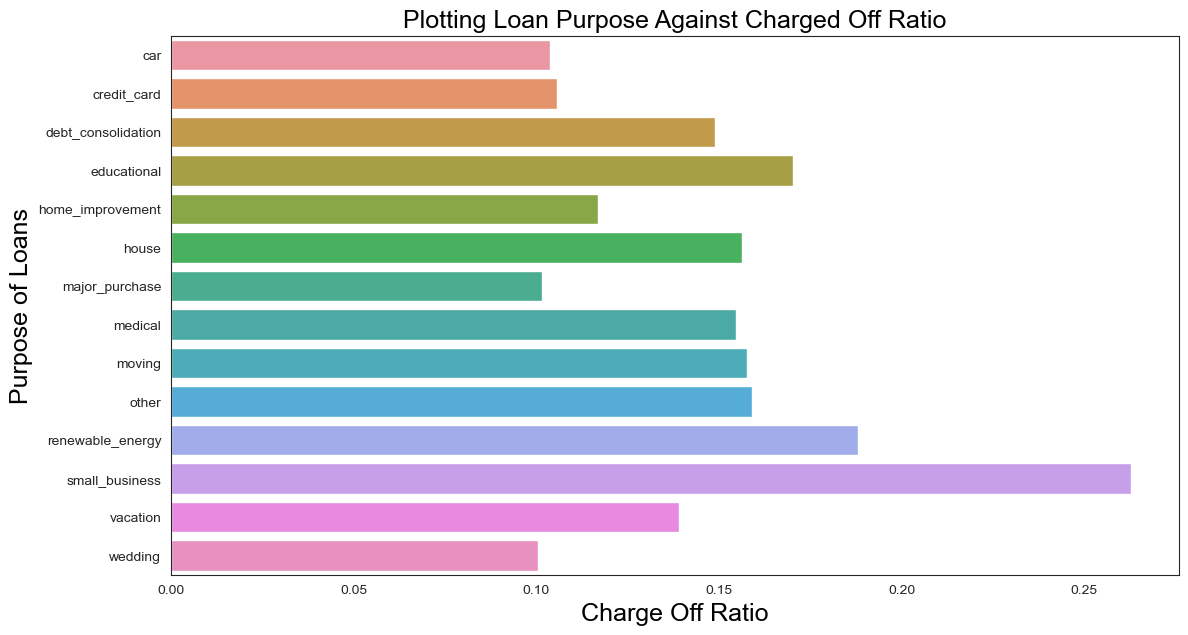

In [41]:
fig, ax1 = plt.subplots(figsize=(13, 7),facecolor='white')
ax1.set_title('Plotting Loan Purpose Against Charged Off Ratio',fontsize=18,color = 'black')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purposeVsChargeOff)
ax1.set_ylabel('Purpose of Loans',fontsize=18,color='black')
ax1.set_xlabel('Charge Off Ratio',fontsize=18,color = 'black')
plt.show()

<h4><i><center>Small Business Owners have the highest likely hood of being charged off, even higher than credit card payoffs. Wedding loans seems to be paid back in highest proportions without being Charged Off. Along with Major purchase, and car. Car itself, happens to be a major purchase</h4></i></center>

<h3><b>Grade V/S ChargedOff Ratio</h3></b>

<b><i><h4>Generating Data</h4></b></i>

In [42]:
GradeVsChargeOff = candidates.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
GradeVsChargeOff['Total'] = GradeVsChargeOff['Charged Off'] + GradeVsChargeOff['Current'] + GradeVsChargeOff['Fully Paid'] 
GradeVsChargeOff['Chargedoff_Proportion'] = GradeVsChargeOff['Charged Off'] / GradeVsChargeOff['Total']
GradeVsChargeOff.sort_values('Chargedoff_Proportion', ascending=False)


loan_status grade  Charged Off  Current  Fully Paid  Total  \
6               G           99       17         190    306   
5               F          312       71         642   1025   
4               E          704      176        1906   2786   
3               D         1112      216        3916   5244   
2               C         1342      262        6411   8015   
1               B         1414      344       10167  11925   
0               A          601       40        9377  10018   

loan_status  Chargedoff_Proportion  
6                             0.32  
5                             0.30  
4                             0.25  
3                             0.21  
2                             0.17  
1                             0.12  
0                             0.06

<h4>Plotting this Grade V/S ChargedOff Ratio Data For Visual Understanding</h4>

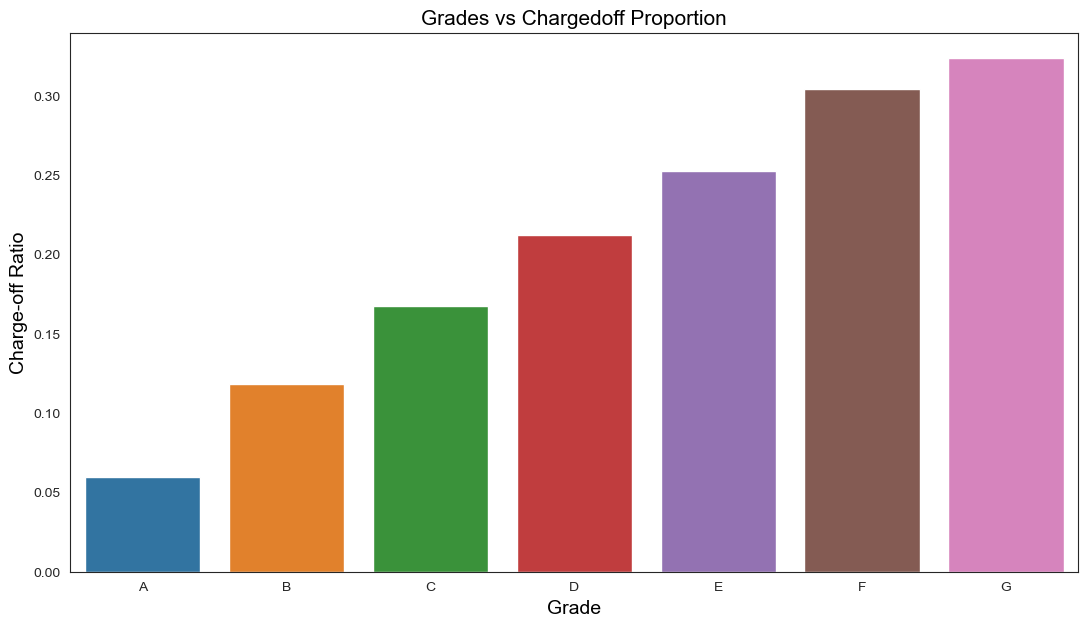

In [43]:
fig, ax1 = plt.subplots(figsize=(13, 7),facecolor='white')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=GradeVsChargeOff)
ax1.set_xlabel('Grade',fontsize=14,color='black')
ax1.set_ylabel('Charge-off Ratio',fontsize=14,color ='black')
plt.show()

<h4><i><center>Grade A has the lowest Likelihood of being charged off and G highest, therefore, as the alphabets go on, so does the charge off ratio, therefore a positive linear distribution between the two.</h4></i></center>

<h3><b>Lets Dig Deeper by Sub Sectioning Grades</h3></b>

In [44]:
GradeVsChargeOff = candidates.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
GradeVsChargeOff['Total'] = GradeVsChargeOff['Charged Off'] + GradeVsChargeOff['Current'] + GradeVsChargeOff['Fully Paid'] 
GradeVsChargeOff['Chargedoff_Proportion'] = GradeVsChargeOff['Charged Off'] / GradeVsChargeOff['Total']
GradeVsChargeOff.sort_values('Chargedoff_Proportion', ascending=False)

loan_status sub_grade  Charged Off  Current  Fully Paid   Total  \
29                 F5        53.00     4.00       55.00  112.00   
32                 G3        19.00     3.00       25.00   47.00   
31                 G2        27.00     1.00       47.00   75.00   
34                 G5        10.00     1.00       18.00   29.00   
28                 F4        52.00    17.00       96.00  165.00   
30                 G1        31.00    10.00       61.00  102.00   
23                 E4       126.00    28.00      293.00  447.00   
26                 F2        69.00    16.00      162.00  247.00   
27                 F3        50.00    11.00      118.00  179.00   
25                 F1        88.00    23.00      211.00  322.00   
24                 E5       106.00    29.00      264.00  399.00   
20                 E1       195.00    40.00      517.00  752.00   
21                 E2       160.00    42.00      444.00  646.00   
19                 D5       209.00    36.00      617.00  862.00   
33                 G4        12.00     2.00       39.00   53.00   
18                 D4       214.00    63.00      693.00  970.00   
17                 D3       253.00    56.00      850.00 1159.00   
22                 E3       117.00    37.00      388.00  542.00   
16                 D2       269.00    61.00     1000.00 1330.00   
15                 D1       167.00     0.00      756.00  923.00   
12                 C3       269.00    41.00     1200.00 1510.00   
14                 C5       208.00    32.00      931.00 1171.00   
13                 C4       211.00    30.00      988.00 1229.00   
11                 C2       321.00    78.00     1593.00 1992.00   
10                 C1       333.00    81.00     1699.00 2113.00   
9                  B5       356.00    89.00     2244.00 2689.00   
8                  B4       328.00    74.00     2097.00 2499.00   
7                  B3       335.00    92.00     2457.00 2884.00   
6                  B2       225.00    56.00     1753.00 2034.00   
5                  B1       170.00    33.00     1616.00 1819.00   
4                  A5       216.00    27.00     2478.00 2721.00   
3                  A4       178.00    13.00     2676.00 2867.00   
2                  A3       103.00     0.00     1696.00 1799.00   
1                  A2        74.00     0.00     1425.00 1499.00   
0                  A1        30.00     0.00     1102.00 1132.00   

loan_status  Chargedoff_Proportion  
29                            0.47  
32                            0.40  
31                            0.36  
34                            0.34  
28                            0.32  
30                            0.30  
23                            0.28  
26                            0.28  
27                            0.28  
25                            0.27  
24                            0.27  
20                            0.26  
21                            0.25  
19                            0.24  
33                            0.23  
18                            0.22  
17                            0.22  
22                            0.22  
16                            0.20  
15                            0.18  
12                            0.18  
14                            0.18  
13                            0.17  
11                            0.16  
10                            0.16  
9                             0.13  
8                             0.13  
7                             0.12  
6                             0.11  
5                             0.09  
4                             0.08  
3                             0.06  
2                             0.06  
1                             0.05  
0                             0.03

<h4>Plotting...</h4>

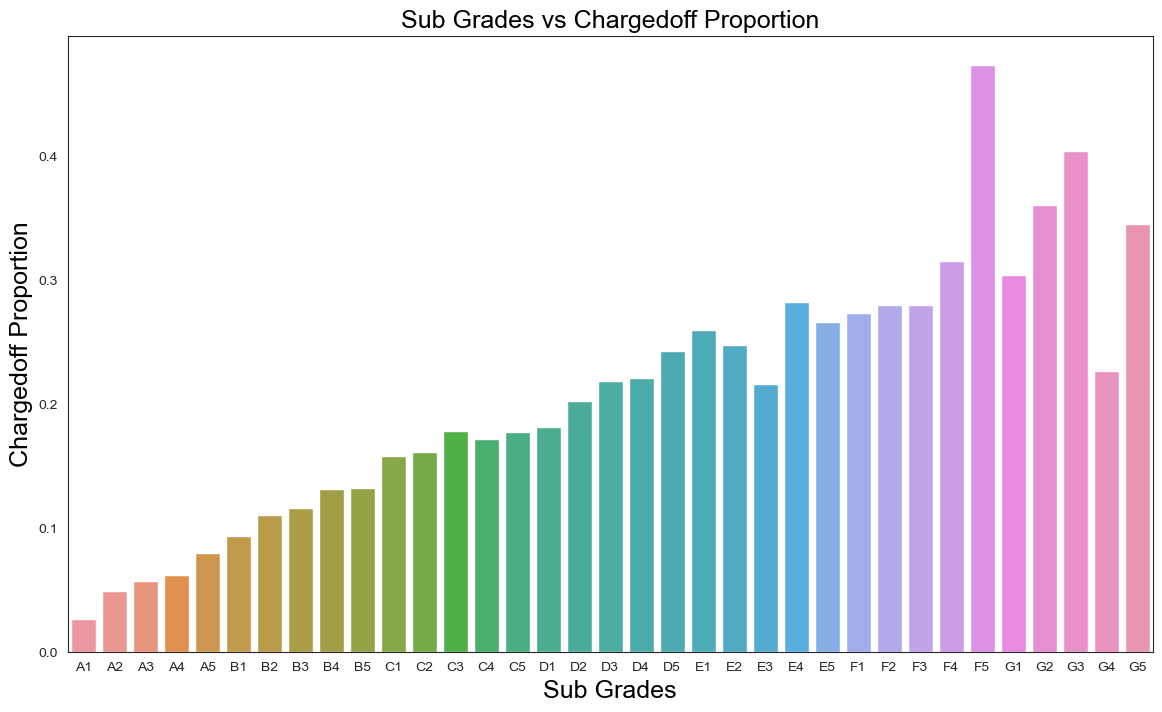

In [45]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='white')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=18,color='black')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=GradeVsChargeOff)
ax1.set_xlabel('Sub Grades',fontsize=18,color='black')
ax1.set_ylabel('Chargedoff Proportion',fontsize=18,color = 'black')
plt.show()

<h4><i><center>Again, previous analysis is confirmed as we move from A to G in sections, the lower alphabetical grade is associated with higher charge off rate, with the exception of F4, which is an outlier for being exceptionally bad.</h4></i></center>

<h3><b>Rate of Interest V/S Charge-Off Ratio</h3></b>

In [46]:
intstVsChargeOff = candidates.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intstVsChargeOff['Total'] = intstVsChargeOff['Charged Off'] + intstVsChargeOff['Current'] + intstVsChargeOff['Fully Paid'] 
intstVsChargeOff['Chargedoff_Proportion'] = intstVsChargeOff['Charged Off'] / intstVsChargeOff['Total']
intstVsChargeOff.sort_values('Chargedoff_Proportion', ascending=True)


loan_status int_rate_cats  Charged Off  Current  Fully Paid  Total  \
0                    0-10          825       77       11403  12305   
1                   10-13         1224      269        8083   9576   
2                 12.5-16         1995      329        9354  11678   
3                    16 +         1250      351        3317   4918   

loan_status  Chargedoff_Proportion  
0                             0.07  
1                             0.13  
2                             0.17  
3                             0.25

<h4>Plotting the Generated Data</h4>

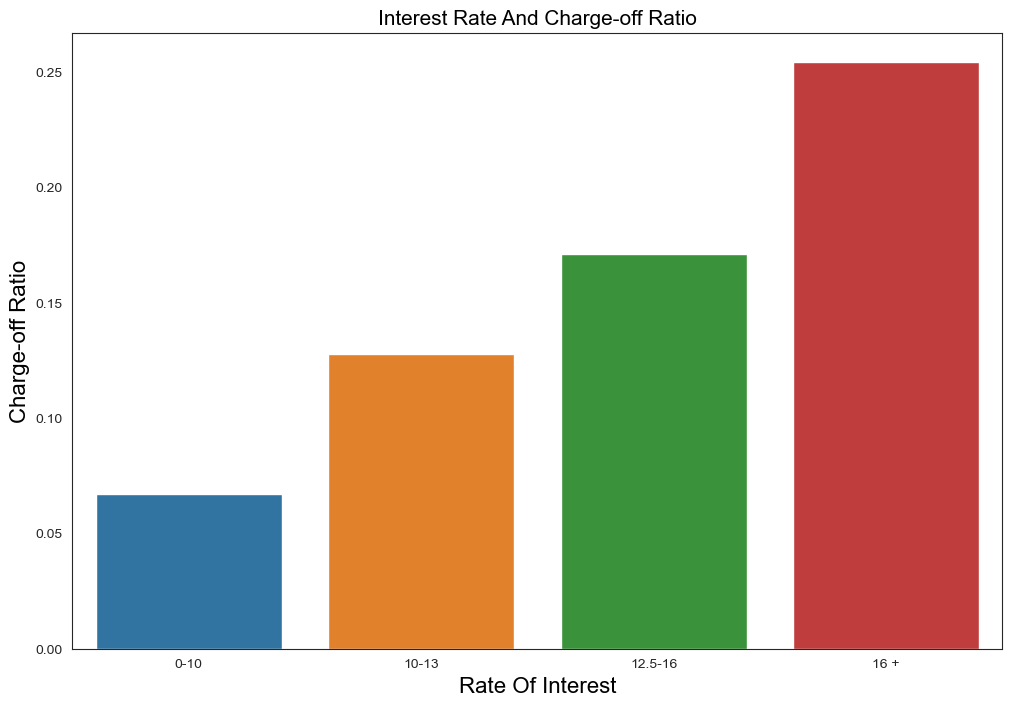

In [47]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='white')
ax1.set_title('Interest Rate And Charge-off Ratio',fontsize=15,color='black')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=intstVsChargeOff)
ax1.set_xlabel('Rate Of Interest',fontsize=16,color='black')
ax1.set_ylabel('Charge-off Ratio',fontsize=16,color = 'black')
plt.show()

<h4><i><center>Correlation can once again be observed, quite linear, and positive. Meaning direct proportion. Lower interest rates correspond to lower ChargeOff Rates. And higher interest rates correspond to higher charge off rates. Therefore, unnecessarily jacking up the rate of interest, might also increase the charge off ratio.</h4></i></center>

<h3><b>Employment Length v/s Charge-Off Ratio</h3></b>

In [48]:
joblengthVSChargeOff = candidates.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
joblengthVSChargeOff['Total'] = joblengthVSChargeOff['Charged Off'] + joblengthVSChargeOff['Current'] + joblengthVSChargeOff['Fully Paid'] 
joblengthVSChargeOff['Chargedoff_Proportion'] = joblengthVSChargeOff['Charged Off'] / joblengthVSChargeOff['Total']
joblengthVSChargeOff.sort_values('Chargedoff_Proportion', ascending=False)

loan_status  emp_length  Charged Off  Current  Fully Paid  Total  \
0                     0          227       42         801   1070   
10                   10         1316      386        7038   8740   
7                     7          262       62        1435   1759   
1                     1         1090      143        6533   7766   
5                     5          456       87        2712   3255   
8                     8          203       43        1216   1462   
6                     6          305       58        1846   2209   
3                     3          551       82        3426   4059   
4                     4          456       94        2860   3410   
2                     2          561       97        3684   4342   
9                     9          157       32        1058   1247   

loan_status  Chargedoff_Proportion  
0                             0.21  
10                            0.15  
7                             0.15  
1                             0.14  
5                             0.14  
8                             0.14  
6                             0.14  
3                             0.14  
4                             0.13  
2                             0.13  
9                             0.13

<h4>Plotting Employment Length v/s Charge-Off Ratio</h4>

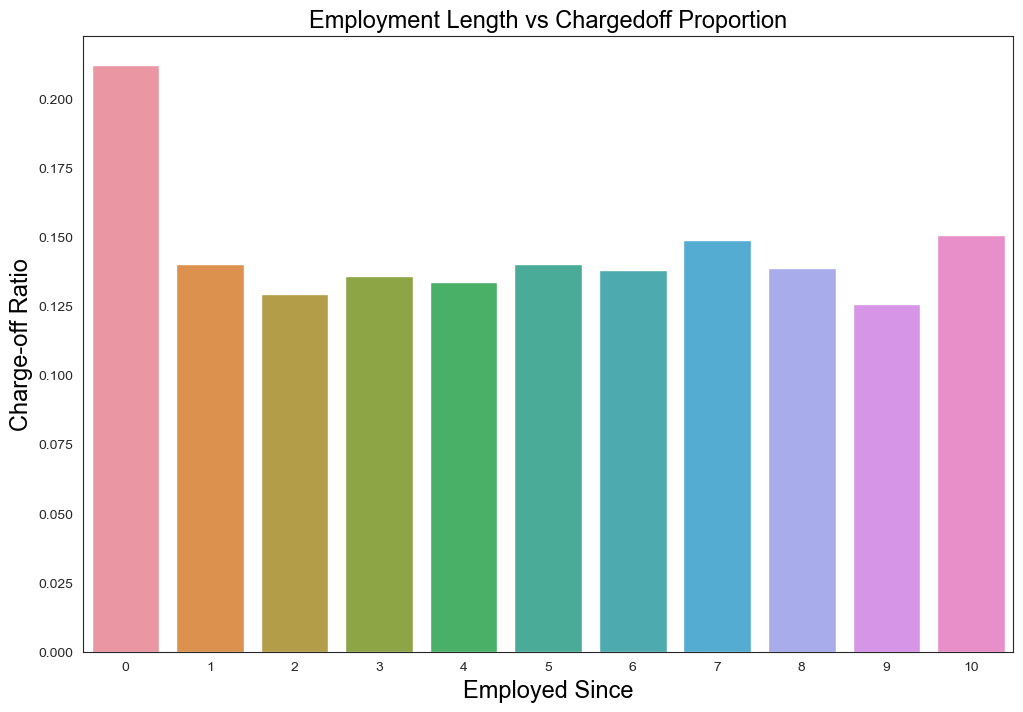

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='white')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=17,color='black')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=joblengthVSChargeOff)
ax1.set_xlabel('Employed Since',fontsize=17,color='black')
ax1.set_ylabel('Charge-off Ratio',fontsize=17,color = 'black')
plt.show()

<h4><i><center>This isn't a good predictor of charge off rates, because the chart is all over the place. Except for some one with less than 1 year of job experience, this datapoint isn't a good judge for anything. However, approval of loan for someone with less than one year of job experience should be analyse very serious, thats the only worthy data point in this analyis.</h4></i></center>

<h3><b>Charge-Off Ratio By State Of Residence Of The Applicant</h3></b>

In [50]:
stateVSChargeOff = candidates.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
stateVSChargeOff['Total'] = stateVSChargeOff['Charged Off'] + stateVSChargeOff['Current'] + stateVSChargeOff['Fully Paid'] 
stateVSChargeOff['Chargedoff_Proportion'] = stateVSChargeOff['Charged Off'] / stateVSChargeOff['Total']
stateVSChargeOff.sort_values('Chargedoff_Proportion', ascending=False)



loan_status addr_state  Charged Off  Current  Fully Paid   Total  \
28                  NE         3.00     0.00        2.00    5.00   
32                  NV       107.00    17.00      368.00  492.00   
40                  SD        12.00     2.00       50.00   64.00   
0                   AK        14.00     2.00       63.00   79.00   
9                   FL       497.00    85.00     2252.00 2834.00   
24                  MO       114.00    16.00      551.00  681.00   
13                  ID         1.00     0.00        5.00    6.00   
31                  NM        30.00     5.00      149.00  184.00   
11                  HI        28.00     8.00      138.00  174.00   
4                   CA      1116.00   149.00     5767.00 7032.00   
36                  OR        71.00    16.00      364.00  451.00   
43                  UT        40.00     6.00      211.00  257.00   
20                  MD       161.00    26.00      849.00 1036.00   
10                  GA       215.00    38.00     1135.00 1388.00   
46                  WA       127.00    22.00      684.00  833.00   
30                  NJ       277.00    59.00     1490.00 1826.00   
29                  NH        25.00     5.00      139.00  169.00   
27                  NC       114.00    38.00      629.00  781.00   
22                  MI       102.00    16.00      596.00  714.00   
39                  SC        66.00    13.00      389.00  468.00   
3                   AZ       121.00    30.00      718.00  869.00   
17                  KY        45.00    13.00      266.00  324.00   
47                  WI        63.00    20.00      376.00  459.00   
35                  OK        40.00    12.00      246.00  298.00   
23                  MN        81.00    10.00      522.00  613.00   
14                  IL       196.00    47.00     1262.00 1505.00   
33                  NY       488.00   111.00     3156.00 3755.00   
26                  MT        11.00     2.00       72.00   85.00   
38                  RI        25.00     4.00      165.00  194.00   
6                   CT        94.00    24.00      618.00  736.00   
44                  VA       176.00    38.00     1182.00 1396.00   
34                  OH       153.00    44.00     1020.00 1217.00   
5                   CO        97.00    26.00      659.00  782.00   
18                  LA        53.00     9.00      367.00  429.00   
1                   AL        54.00    17.00      378.00  449.00   
48                  WV        21.00     5.00      151.00  177.00   
19                  MA       156.00    42.00     1123.00 1321.00   
37                  PA       178.00    49.00     1281.00 1508.00   
41                  TN         2.00     0.00       15.00   17.00   
42                  TX       313.00    66.00     2315.00 2694.00   
16                  KS        31.00    16.00      224.00  271.00   
45                  VT         6.00     1.00       47.00   54.00   
2                   AR        27.00    10.00      208.00  245.00   
25                  MS         2.00     0.00       17.00   19.00   
8                   DE        12.00     1.00      101.00  114.00   
7                   DC        15.00     3.00      196.00  214.00   
49                  WY         4.00     3.00       76.00   83.00   
21                  ME         0.00     0.00        3.00    3.00   
15                  IN         0.00     0.00        9.00    9.00   
12                  IA         0.00     0.00        5.00    5.00   

loan_status  Chargedoff_Proportion  
28                            0.60  
32                            0.22  
40                            0.19  
0                             0.18  
9                             0.18  
24                            0.17  
13                            0.17  
31                            0.16  
11                            0.16  
4                             0.16  
36                            0.16  
43                            0.16  
20                            0.16  
10           

<h4>Plotting the Generated Data...</h4>

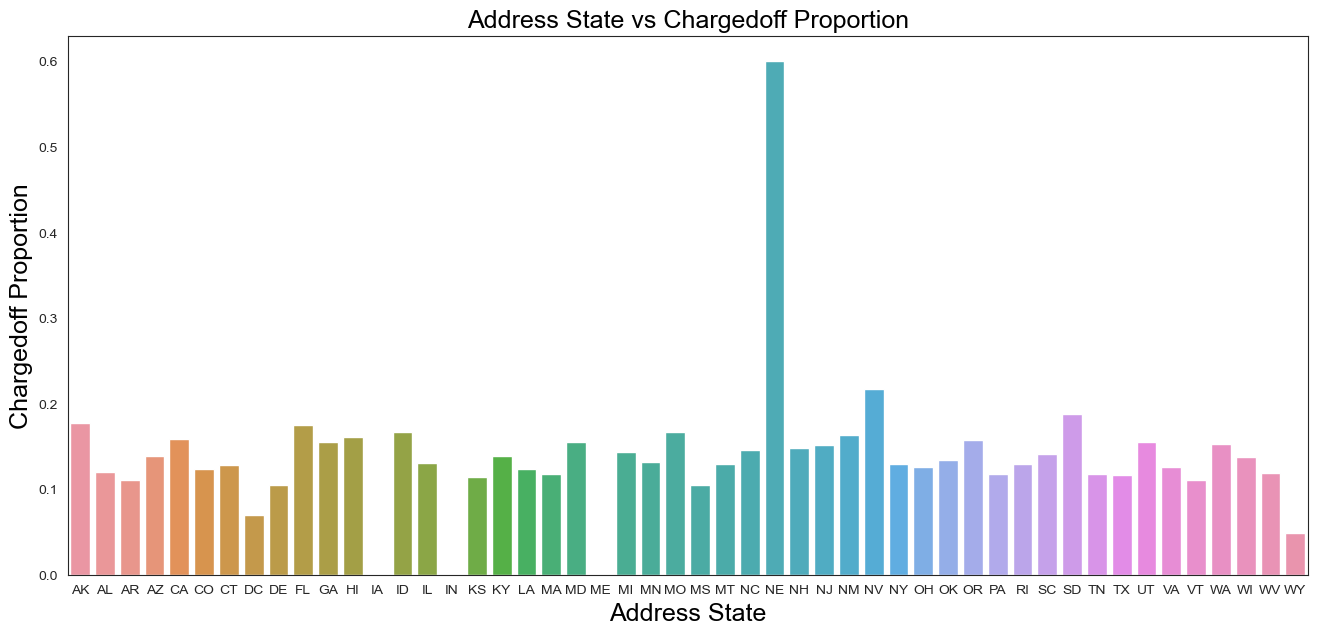

In [51]:
fig, ax1 = plt.subplots(figsize=(16, 7),facecolor='white')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=18,color='black')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=stateVSChargeOff)
ax1.set_xlabel('Address State',fontsize=18,color='black')
ax1.set_ylabel('Chargedoff Proportion',fontsize=18,color = 'black')
plt.show()


<h4><i><center>Again, apart from the State of NE, this datapoint isn't very useful in deciphering the risk. Be careful about applicants from NR, and very good in IN and IA, which might be outliers. But yes, this that is only somewhat helpful.</h4></i></center>

<h3><b>Charge-Off Ratio By Verification Status of The Applicant</h3></b>

In [52]:
veriVsChargeOff = candidates.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
veriVsChargeOff['Total'] = veriVsChargeOff['Charged Off'] + veriVsChargeOff['Current'] + veriVsChargeOff['Fully Paid'] 
veriVsChargeOff['Chargedoff_Proportion'] = veriVsChargeOff['Charged Off'] / veriVsChargeOff['Total']
veriVsChargeOff.sort_values('Chargedoff_Proportion', ascending=False)


loan_status verification_status  Charged Off  Current  Fully Paid  Total  \
2                      Verified         2032      593       10000  12625   
1               Source Verified         1422      306        8135   9863   
0                  Not Verified         2130      227       14474  16831   

loan_status  Chargedoff_Proportion  
2                             0.16  
1                             0.14  
0                             0.13

<h4>Plotting the Generated Data</h4>

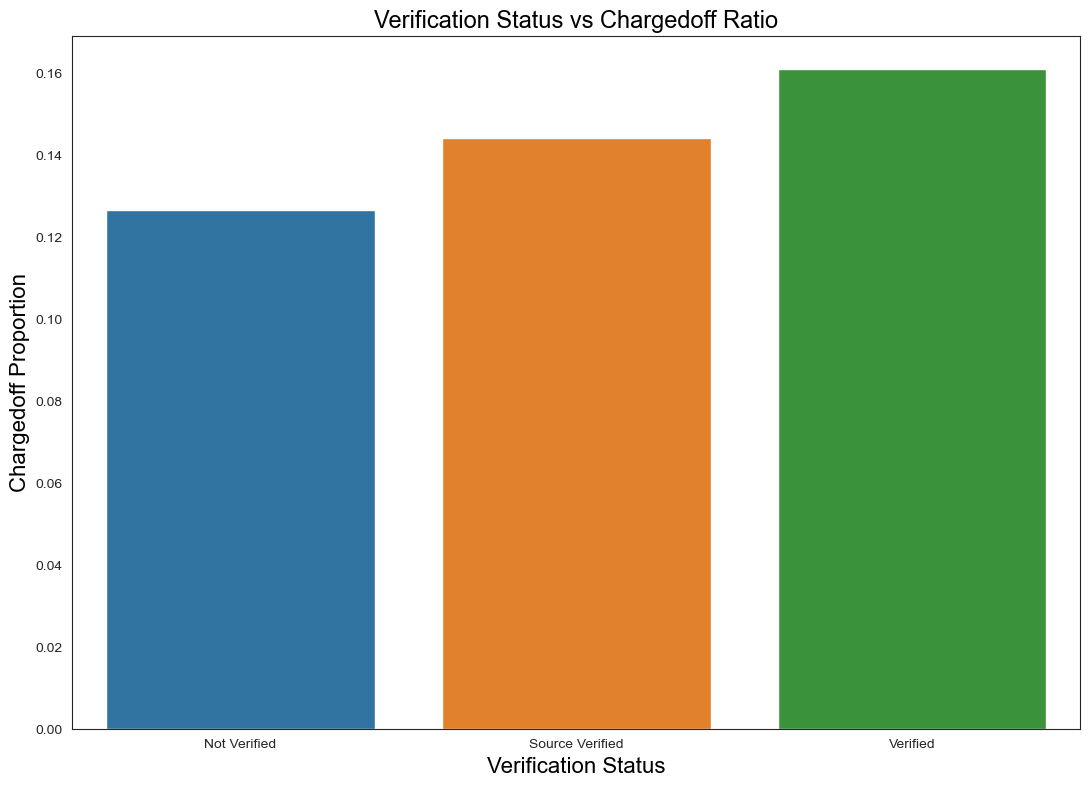

In [53]:
fig, ax1 = plt.subplots(figsize=(13, 9),facecolor='white')
ax1.set_title('Verification Status vs Chargedoff Ratio',fontsize=17,color='black')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=veriVsChargeOff)
ax1.set_xlabel('Verification Status',fontsize=16,color='black')
ax1.set_ylabel('Chargedoff Proportion',fontsize=16,color = 'black')
plt.show()

<h4><i><center>Definitely some impact, but nothing decisive, compared to may variables already analysed.</h4></i></center>

<h3><b>Charge-Off Ratio By pub_rec_bankruptcies of the applicant</h3></b>

In [54]:
BankruptcyVSChargeOff = candidates.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
BankruptcyVSChargeOff['Total']=BankruptcyVSChargeOff['Charged Off']+BankruptcyVSChargeOff['Current']+BankruptcyVSChargeOff['Fully Paid'] 
BankruptcyVSChargeOff['Chargedoff_Proportion'] = BankruptcyVSChargeOff['Charged Off'] / BankruptcyVSChargeOff['Total']
BankruptcyVSChargeOff.sort_values('Chargedoff_Proportion', ascending=False)


loan_status pub_rec_bankruptcies  Charged Off  Current  Fully Paid    Total  \
2                              2         2.00     2.00        3.00     7.00   
1                              1       365.00    37.00     1268.00  1670.00   
3                      Not Known       116.00     0.00      572.00   688.00   
0                              0      5101.00  1087.00    30766.00 36954.00   

loan_status  Chargedoff_Proportion  
2                             0.29  
1                             0.22  
3                             0.17  
0                             0.14

<h4>Plotting the Generated Data of Bankruptcy and Charge Off Ratio...</h4>

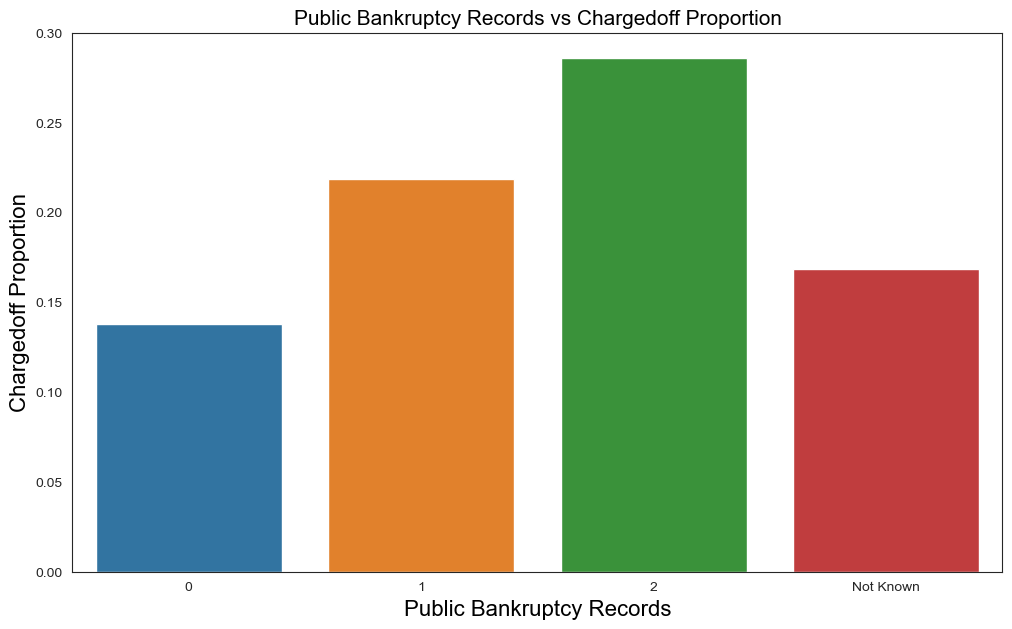

In [55]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='white')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=BankruptcyVSChargeOff)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=16,color='black')
ax1.set_ylabel('Chargedoff Proportion',fontsize=16,color = 'black')
plt.show()


<h4><i><center>This seems to be a good indicator for charge off, since it is quite linear and directly proportional. This can be thrown in as a final check before discharge a loan to the approved applicant. If he has more than 2 bankruptacies, maybe additional steps can be taken to enhance our chances of avoiding charge offs.</h4></i></center>

<h3><b>Charge-Off Ratio By Derogatory Public Record of the Applicant</h3></b>

In [56]:
DerogatoryVSChargoOff = candidates.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
DerogatoryVSChargoOff['Total']=DerogatoryVSChargoOff['Charged Off']+DerogatoryVSChargoOff['Current']+DerogatoryVSChargoOff['Fully Paid'] 
DerogatoryVSChargoOff['Chargedoff_Proportion'] = DerogatoryVSChargoOff['Charged Off'] / DerogatoryVSChargoOff['Total']
DerogatoryVSChargoOff.sort_values('Chargedoff_Proportion', ascending=False)


loan_status pub_rec  Charged Off  Current  Fully Paid    Total  \
1                 1       454.00    43.00     1551.00  2048.00   
2                 2        10.00     3.00       37.00    50.00   
0                 0      5120.00  1080.00    31012.00 37212.00   
3                 3         0.00     0.00        7.00     7.00   
4                 4         0.00     0.00        2.00     2.00   

loan_status  Chargedoff_Proportion  
1                             0.22  
2                             0.20  
0                             0.14  
3                             0.00  
4                             0.00

<h4>Plotting the Generated Data</h4>


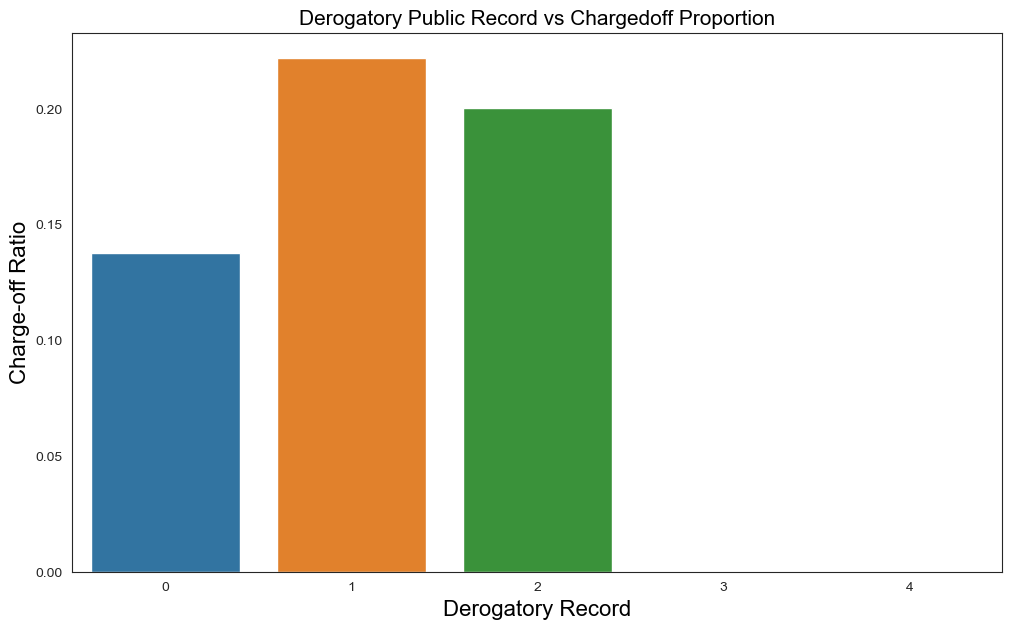

In [57]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='white')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='black')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=DerogatoryVSChargoOff)
ax1.set_xlabel('Derogatory Record',fontsize=16,color='black')
ax1.set_ylabel('Charge-off Ratio',fontsize=16,color = 'black')
plt.show()

<h4><i><center>Inconclusive and Inconsistent. Not helpful in our analysis.</h4></i></center>

<center><h1><b>Bivariate Analysis</b><i> (Excluding Charge Offs Analysis)</i></h1></center>

<h3><b>Loan Purpose <i>v/s</i> Loan Value</h3></b>


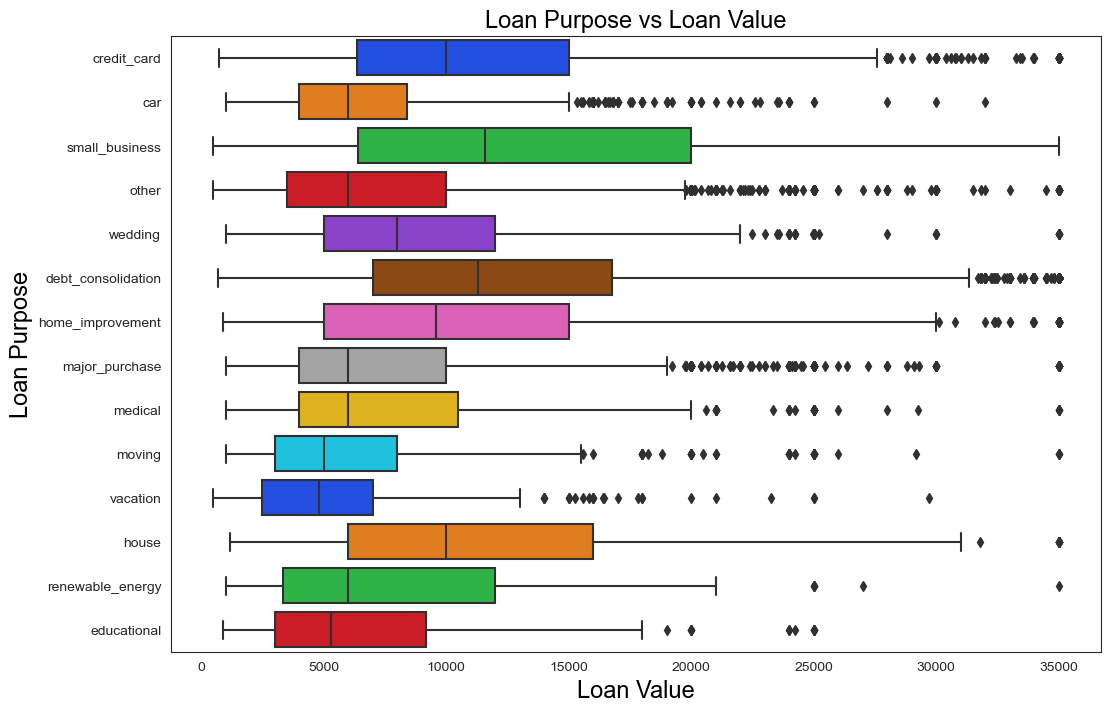

In [58]:
plt.figure(figsize=(12,8),facecolor='white')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =candidates,palette='bright')
ax.set_title('Loan Purpose vs Loan Value',fontsize=17,color='black')
ax.set_ylabel('Loan Purpose',fontsize=17,color = 'black')
ax.set_xlabel('Loan Value',fontsize=17,color = 'black')
plt.show()


<h4><i><center>Small Businesses Tend to Take Largest Values of Loans. Whereas Educational Loans tend to be smallest. Surprisingly, small business loan values are even higher than house.</h4></i></center>

<h2><i>Now Plotting </i><b>Loan Purpose <i>v/s</i> Loan Value</b><i> On a</i> <b>Violin Graph</b><i>, to Get Insights Across Various Categorical Variations</i></h2>


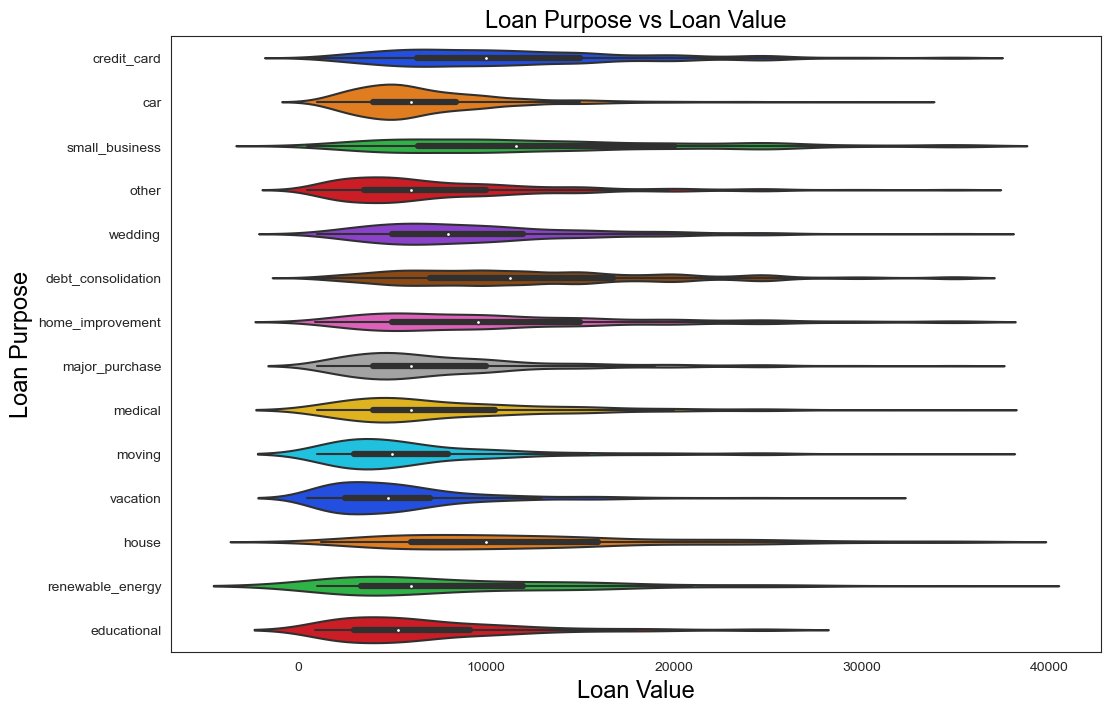

In [59]:
plt.figure(figsize=(12,8),facecolor='white')
ax = sns.violinplot(y='purpose', x='loan_amnt', data =candidates,palette='bright')
ax.set_title('Loan Purpose vs Loan Value',fontsize=17,color='black')
ax.set_ylabel('Loan Purpose',fontsize=17,color = 'black')
ax.set_xlabel('Loan Value',fontsize=17,color = 'black')
plt.show()

<h4><i><center>Housing, Renewable and small_business are evenly distributed compared to other plots, meaning value lacks hard edges, therefore harder to pinpoint.</h4></i></center>

<h3><b>Repayment Terms <i>v/s</i> Interest Rates</h3></b>

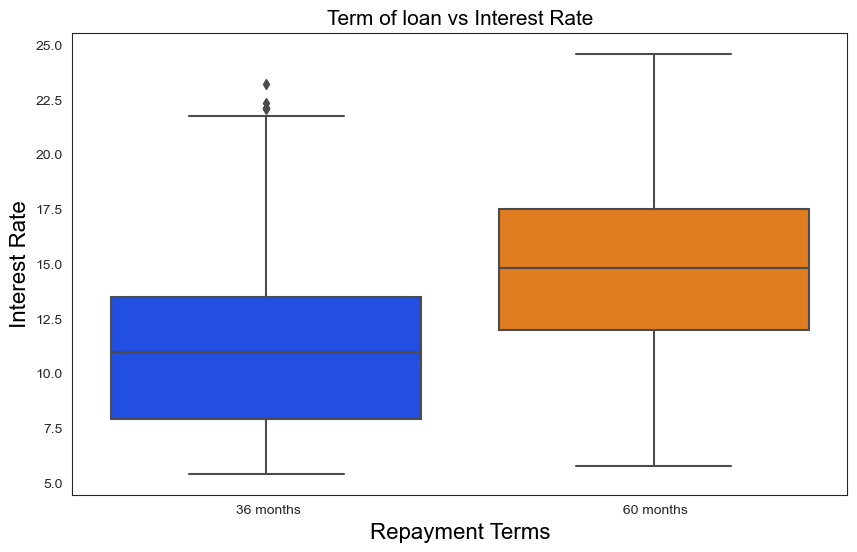

In [60]:
plt.figure(figsize=(10,6),facecolor='white')
ax = sns.boxplot(y='int_rate', x='term', data =candidates,palette='bright')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=16,color = 'black')
ax.set_xlabel('Repayment Terms',fontsize=16,color = 'black')
plt.show()


<h4><i><center>Direct, positive correlation between Repayment Terms and Interest Rates. For Long Duration, the likelihood of charge off increases (as analysed previously) and therefore higher interest rates are charged.</h4></i></center>

<h3><b>Loan Purpose</b> <i>v/s</i> <b>Interest Rates</h3></b>

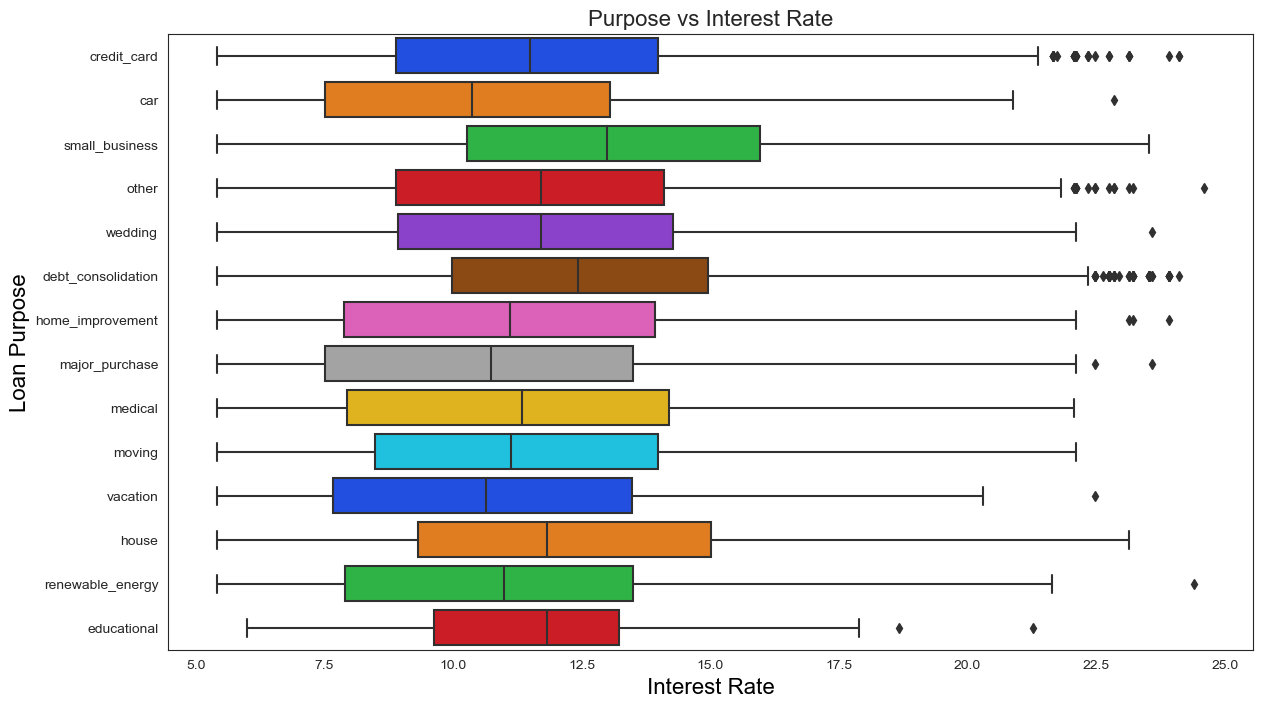

In [61]:
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(x='int_rate', y='purpose', data = candidates, palette='bright')
ax.set_title('Purpose vs Interest Rate',fontsize=16)
ax.set_xlabel('Interest Rate',fontsize=16,color = 'black')
ax.set_ylabel('Loan Purpose',fontsize=16,color = 'black')
plt.show()

<h4><i><center>Being one of the highest Charge Off categories, loans for the small businesses tend to attract the largest interest rates. Strangley, lower interest rates also corresponds to somewhat less charge-off rates. Educational loans by far attract the least interest rates on the other hand. Generousity is the word I would avoid using in the ruthless world of finance, so i would pin it so extremely high rates of returns on a good education, therefore, people are less skeptic in granting such loans.</h4></i></center>

<h3><b>Grade</b> <i>v/s</i> <b>Interest Rates</h3></b>

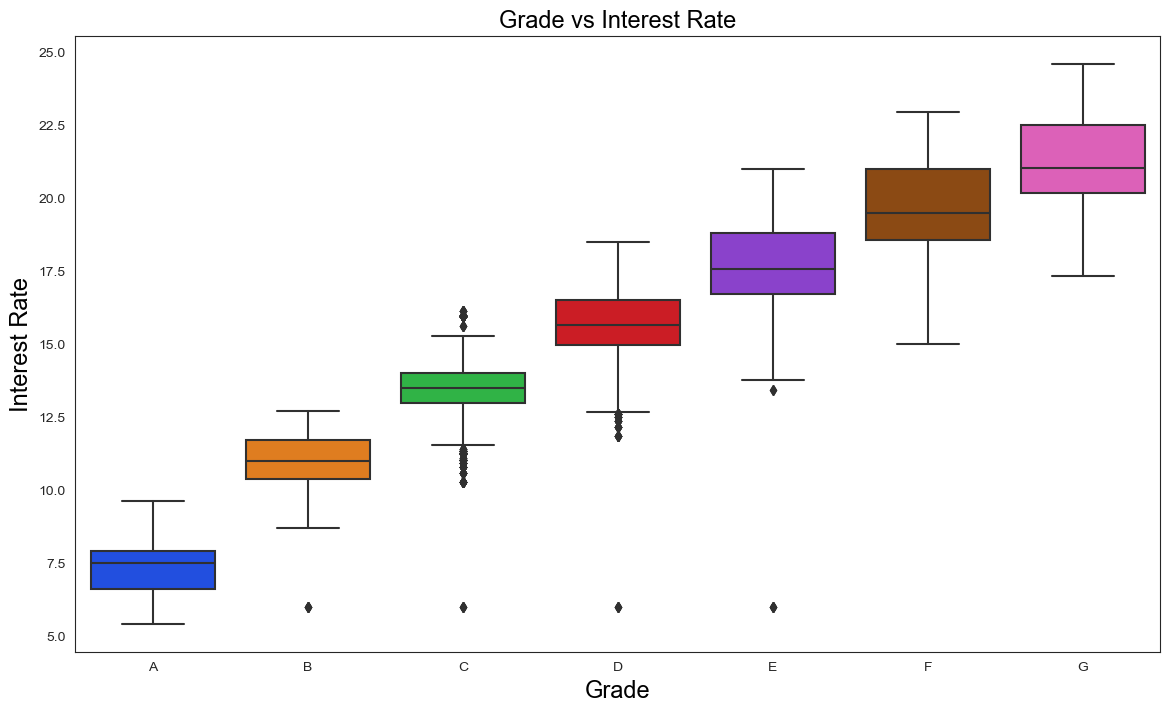

In [62]:

plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='grade', data =candidates, palette='bright', order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=17, color='black')
ax.set_ylabel('Interest Rate',fontsize=17, color = 'black')
ax.set_xlabel('Grade',fontsize=17, color = 'black')
plt.show()

<h4><i><center>We Observe a Very Strong Negavtive Correlation Between Applicant's Credit Grade And Interest Rates Offered to him. A Credit rating of A, corresponds to a very low likely of charge offs. As it declines, to B, C and then further down, interest rates start to go up radically. Meaning higher interest rates are charged as a means to cover for risk if the applicant's Credit Rating is Bad.</h4></i></center>

<h3><b>Loan Value</b> <i>v/s</i> <b>Interest Rates</h3></b>

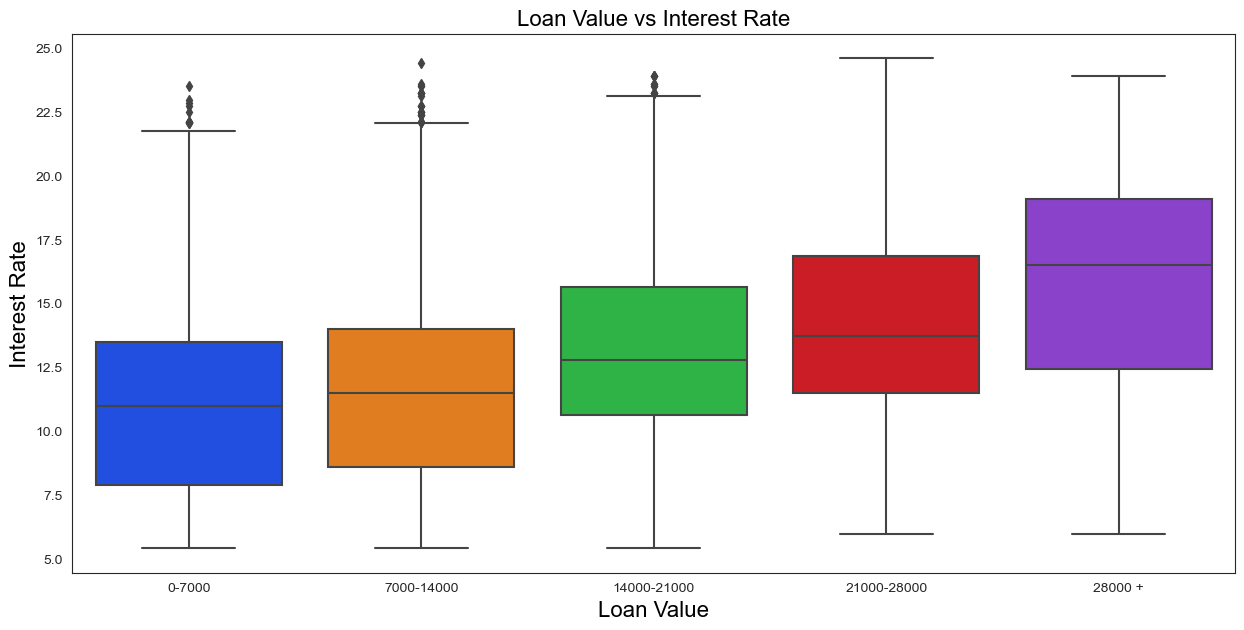

In [63]:
plt.figure(figsize=(15,7),facecolor='white')
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =candidates,palette='bright')
ax.set_title('Loan Value vs Interest Rate',fontsize=16,color='black')
ax.set_ylabel('Interest Rate',fontsize=16,color = 'black')
ax.set_xlabel('Loan Value',fontsize=16,color = 'black')
plt.show()


<h4><i><center>Higher Loan Value corresponds to higher interest, since in case of charge offs, the organisation has a lot to lose. Therefore, risk must be compensated with higher interest Rates. </h4></i></center>

<h3><b>DTI</b> <i>v/s</i> <b>Interest Rates</h3></b>

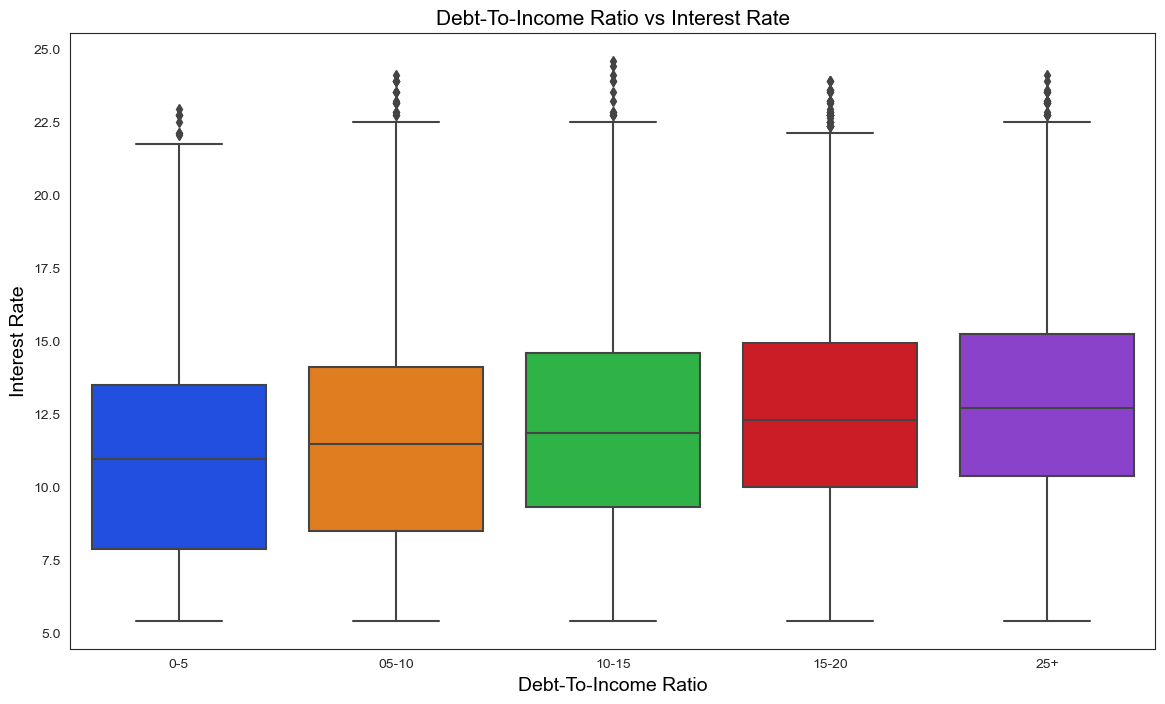

In [64]:
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='dti_cats', data =candidates ,palette='bright')
ax.set_title('Debt-To-Income Ratio vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Debt-To-Income Ratio',fontsize=14,color = 'black')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.

<h4><i><center>Postive Correlation. Lower Debt To Income Ratio Corresponds to lower Interest Rate and Vice Versa</h4></i></center>

<h3><b>Recoveries</b> <i>v/s</i> <b>Annual Income</h3></b>

In [65]:
candidates['recoveries']=pd.to_numeric(candidates['recoveries'],errors='coerce')
loan_df_rec=candidates[candidates['recoveries'] > 0.00]
#Recovery Percentage
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 


<h4>Plotting the graph...</h4>


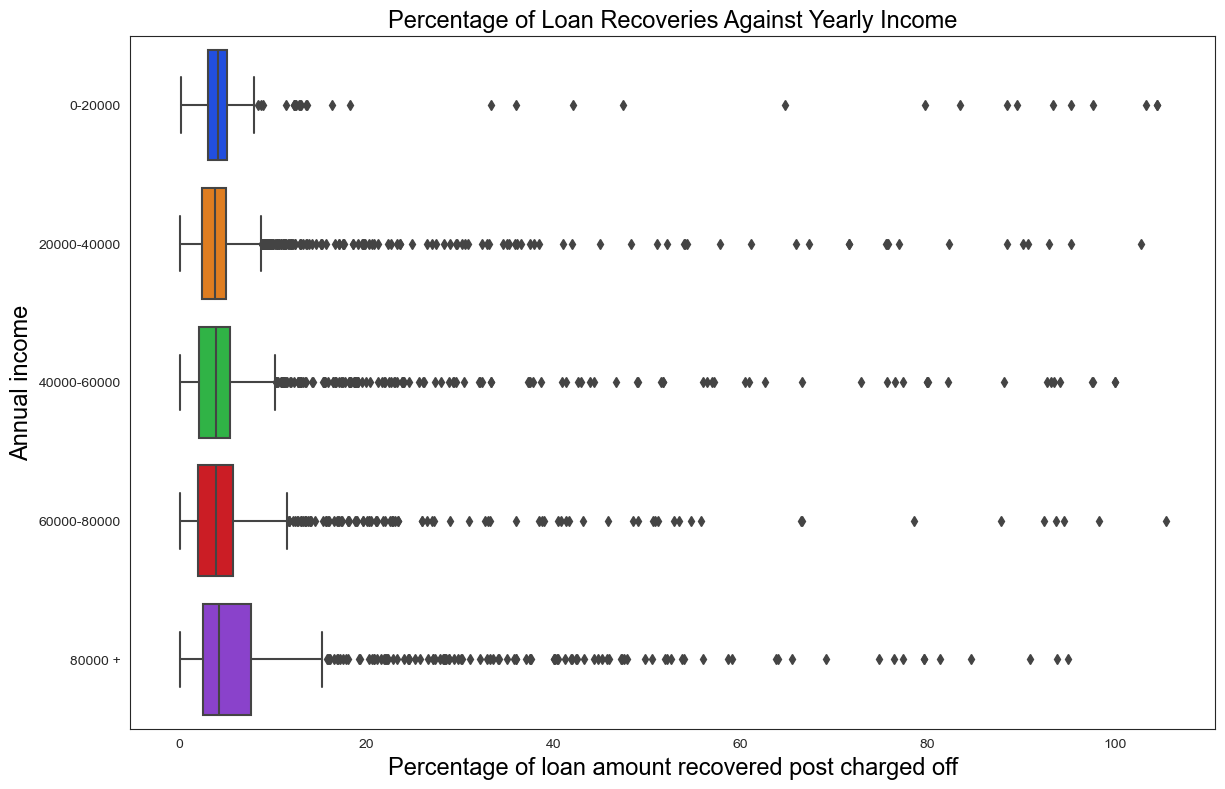

In [66]:
plt.figure(figsize=(14,9),facecolor='white')
ax=sns.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='bright')
ax.set_title('Percentage of Loan Recoveries Against Yearly Income',fontsize=17,color = 'black')
ax.set_ylabel('Annual income',fontsize=17,color = 'black')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=17,color = 'black')
plt.show()

<h4><i><center>Higher Yearly Income Increases The Prevelence of Recovery of Charged Off Value, Making it Open of the most Thing Factors in Our Overall Analysis, as it Has Consistently Been an important Predictor of a Lot of Things</h4></i></center>

<h3><b>Credit Grades</b> <i>v/s</i> <b>Annual Income</h3></b>

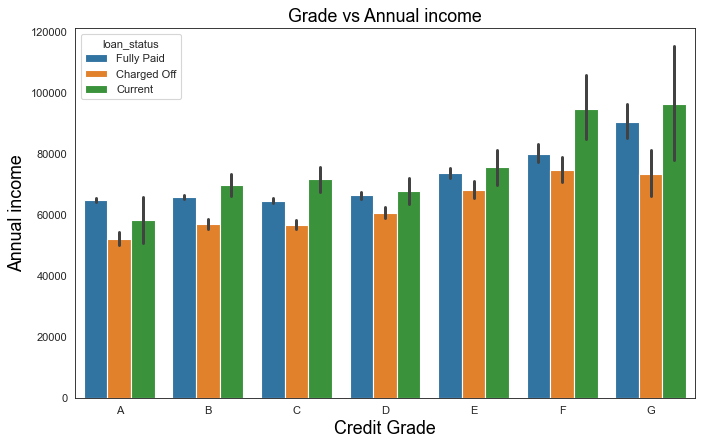

In [67]:
plt.figure(figsize=(10,6), dpi=80, facecolor='white', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=candidates, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=16,color='black')
ax.set_ylabel('Annual income',fontsize=16,color = 'black')
ax.set_xlabel('Credit Grade',fontsize=16,color = 'black')
plt.show()

<h4><i><center>It can be concluded across the Credit Grade that the people getting charged off are generally in the lower income group than the people getting lesser charge offs</h4></i></center>

<h3><b>Year</b> <i>v/s</i> <b>Rate Of Interest</h3></b>

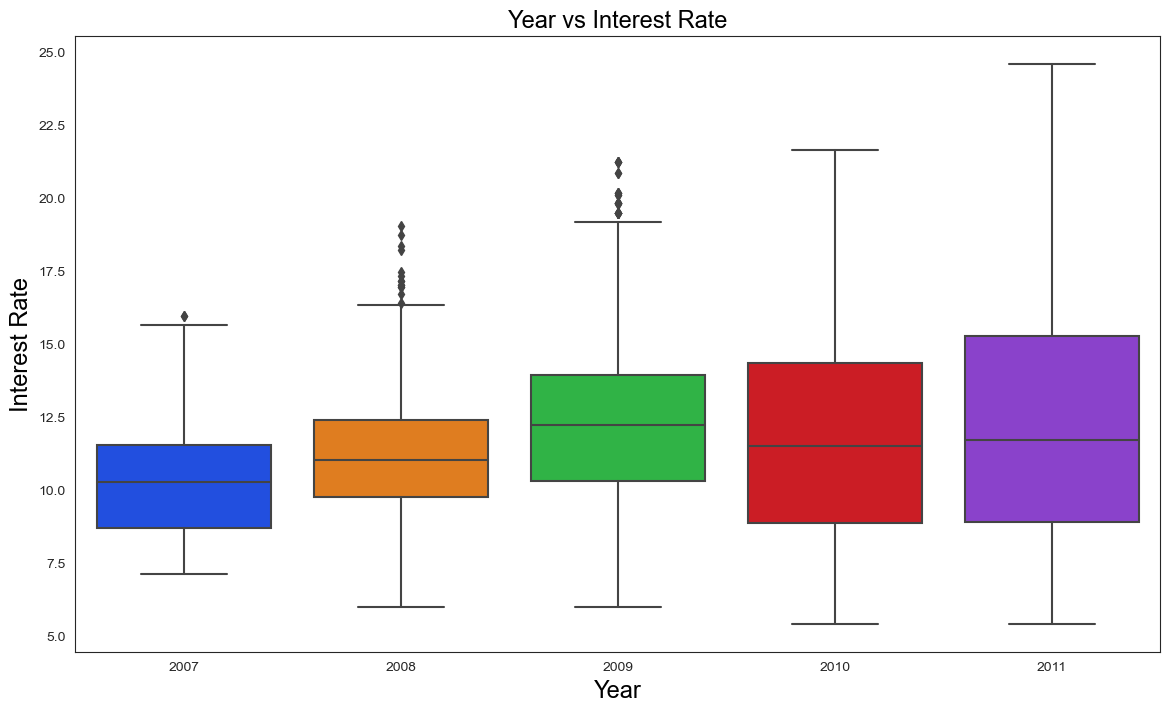

In [68]:
plt.figure(figsize=(14,8),facecolor='white')
ax = sns.boxplot(y='int_rate', x='year', data =candidates,palette='bright')
ax.set_title('Year vs Interest Rate',fontsize=17,color='black')
ax.set_ylabel('Interest Rate',fontsize=17,color = 'black')
ax.set_xlabel('Year',fontsize=17,color = 'black')
plt.show()

<h4><i><center>As the years go by, the interest rates are going up in general, consistently</h4></i></center>

<center><h1><b><i>Multi-Variate</i> Analysis</b></h1></center>

<h3><b>Pair Plots</b></h3>

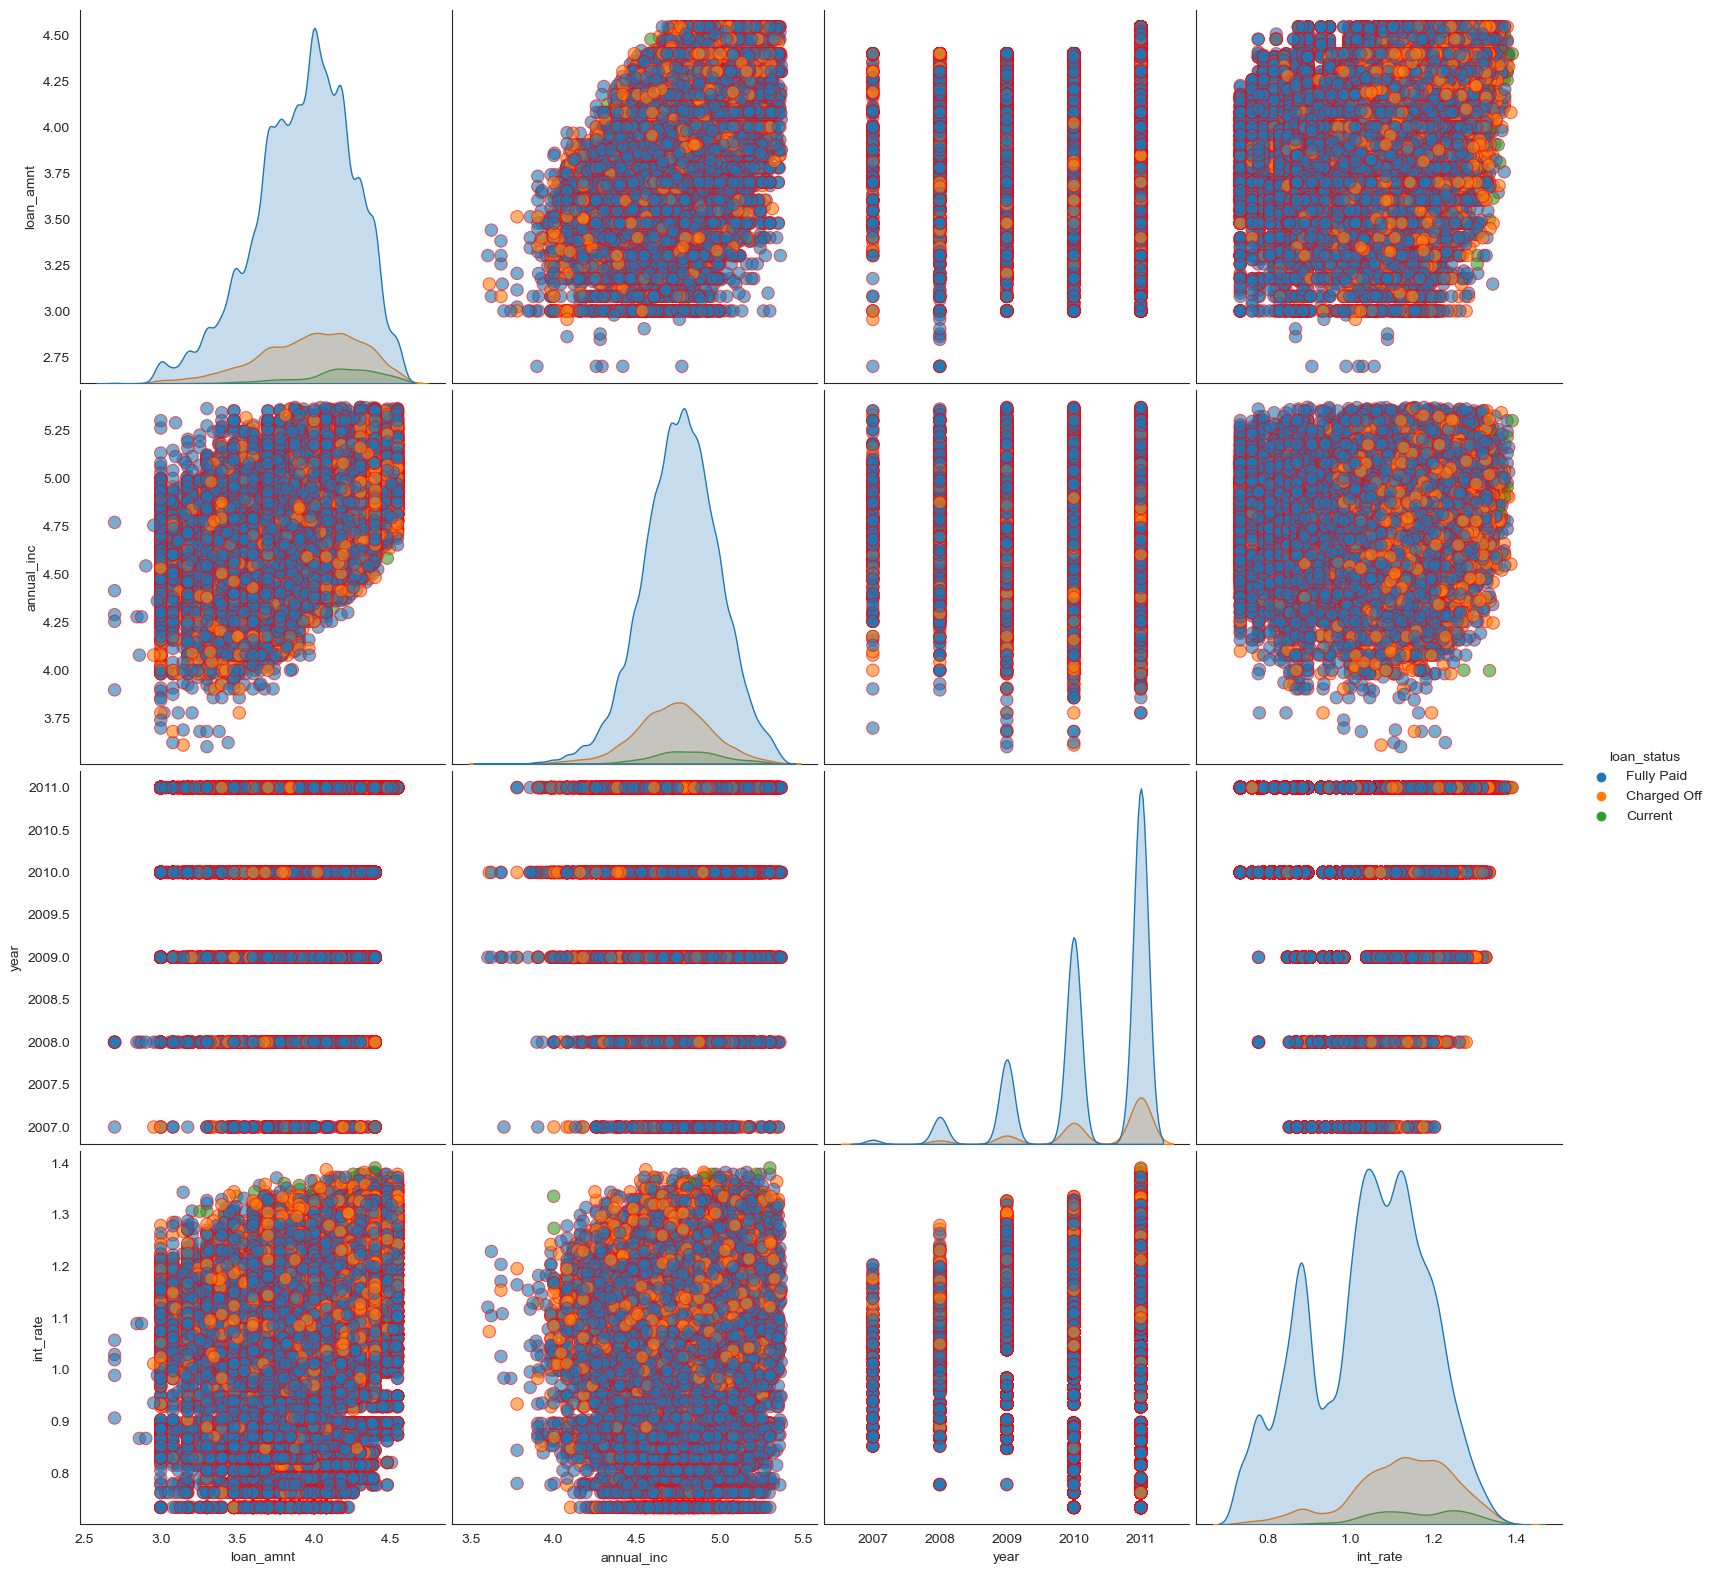

In [69]:
loan_pair = candidates[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

#Taking the logarthimics of highly skewed variables
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot 
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'r'},
             size = 4)
plt.show()

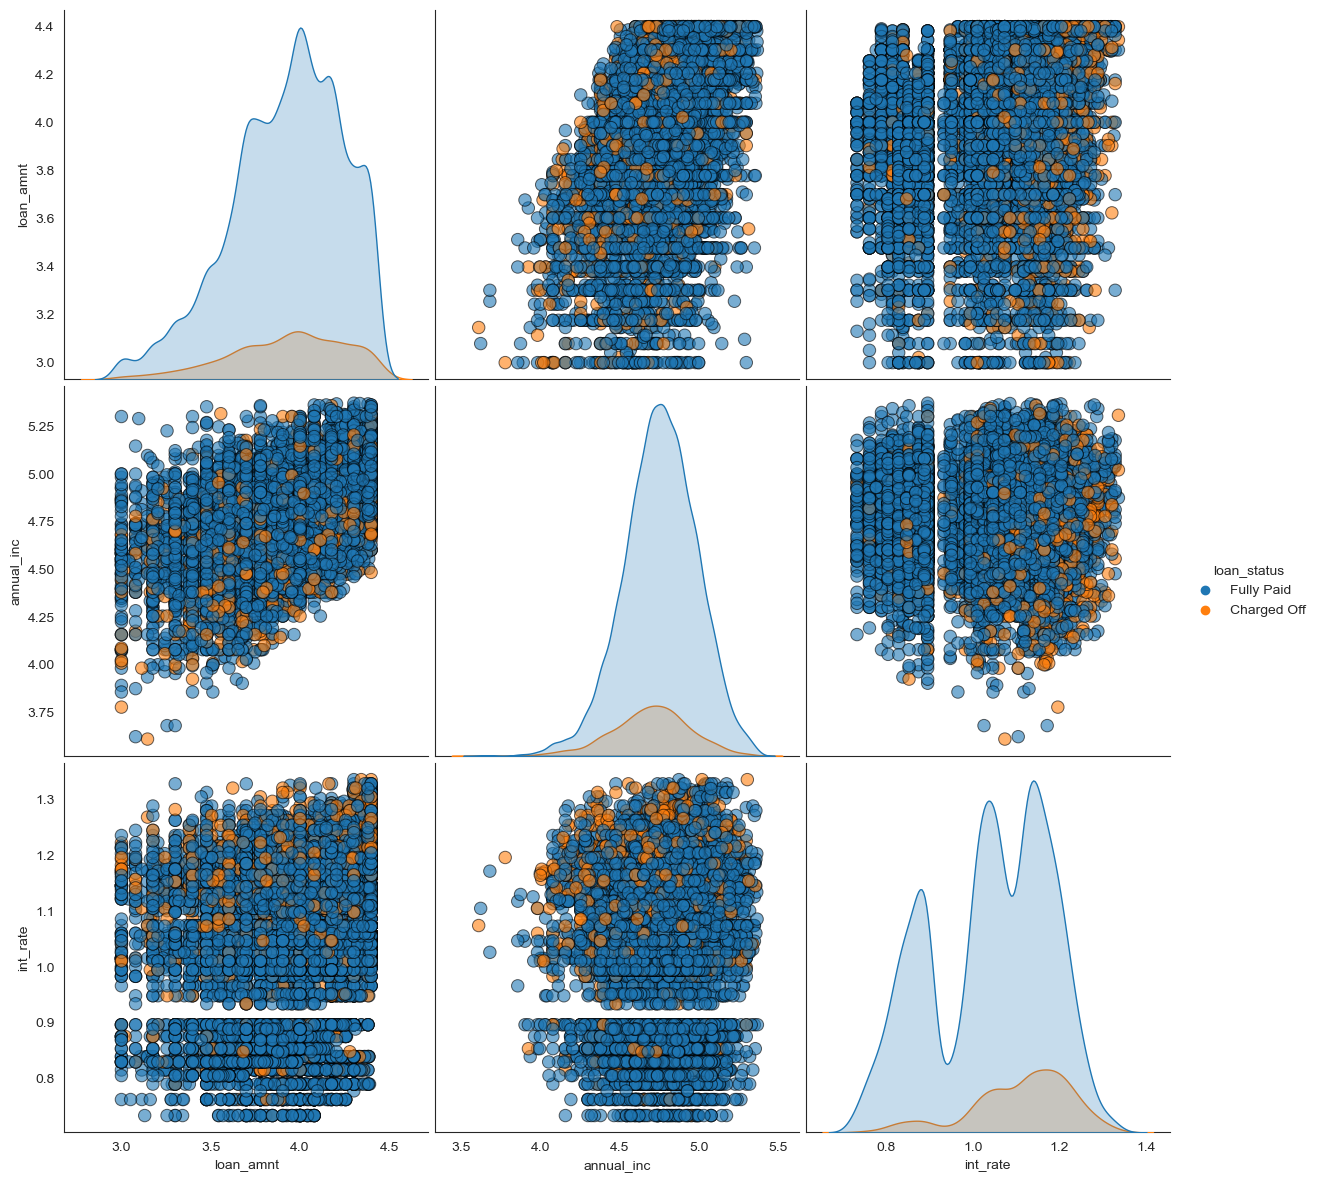

In [70]:
sns.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

<h4><i>* Interest Rates and Charged Off Ratios are in direct correlation with each other.<br>*Loan and Yearly Incomes are also somewhat postively correlated<br>*Year by Year, charge offs are rising, which is also correlated to the rise of number of applicants.</h4></i>

<br><br><center><i><h4>Here By Me And My Partner Submit Our Final Analysis Document. </h4>
    
It was quite a journey, but this is where it ends. :-)</center>
    
I hope we were able to somewhat do justice to task alloted to us.

Thank you For The Amazing Case Study, we learnt a lot.</i>
Presented By:<br>
    <b>Abhinav Tyagi</b> <i>Facilitator <br> abhinav@vayubiotech.com<br></i>
     <b>Vinay Pai</b> <i>Team Member<br>vinaypai1977@gmail.com</i>
        
<center> 
<h2>for <b><i>UPGRAD AND IIIT BANGALORE</b></i></center></h2>